In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import netCDF4 as nc
from salishsea_tools import geo_tools, tidetools, viz_tools, loadDataFRP
from matplotlib.colors import LinearSegmentedColormap

#the following will allow you to load loadDataFRP.py regardless of where you are running your notebook or script
import sys
sys.path.append('/ocean/eolson/MEOPAR/analysis-elise/notebooks/databases/')

import loadDataFRP as LD

%matplotlib inline

In [3]:
stationdata, casts = loadDataFRP.loadDataFRP_SSGrid()

(40, 898, 398) 415 337 1.0
(40, 898, 398) 415 337 2.0
(40, 898, 398) 442 259 3.0
(40, 898, 398) 438 268 4.0


/home/vdo/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:3883: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  check = self.filled(0).__eq__(other)


(40, 898, 398) 434 278 5.0
(40, 898, 398) 432 281 6.0
(40, 898, 398) 430 285 7.0
(40, 898, 398) 428 289 8.0
(40, 898, 398) 427 291 9.0
(40, 898, 398) 412 291 10.0
(40, 898, 398) 443 258 11.0
(40, 898, 398) 438 268 12.0
(40, 898, 398) 434 278 13.0
(40, 898, 398) 432 281 14.1
(40, 898, 398) 432 281 14.2
(40, 898, 398) 432 287 15.0
(40, 898, 398) 432 292 16.0
(40, 898, 398) 427 291 17.0
(40, 898, 398) 415 337 18.0


In [13]:
Bathymetry = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')
bathy, X, Y = tidetools.get_bathy_data(Bathymetry)

In [4]:
stationdata.keys()

Index(['Station', 'Date', 'Date_UTC', 'Time_UTC_hhmmss', 'Time_UTC_DecDay',
       'LatDecDeg', 'LonDecDeg', 'LatDecDeg_surface', 'LonDecDeg_surface',
       'LatDecDeg_bottom', 'LonDecDeg_bottom', 'LatDecDeg_surf2',
       'LonDecDeg_surf2', 'LatDecDeg_Niskin', 'LonDecDeg_Niskin',
       'LatDecDeg_end', 'LonDecDeg_end', 'Sounding', 'MaxWireOut_m',
       'waveHeightEst_m', 'cloudyPct', 'filename', 'time_PDT_hhmmss',
       'time_PDT_decDay', 'time_on_PDT_hhmmss', 'time_on_PDT_decDay',
       'time_surface_PDT_hhmmss', 'time_surface_PDT_decDay',
       'time_bottom_PDT_hhmmss', 'time_bottom_PDT_decDay',
       'time_surf2_PDT_hhmmss', 'time_Niskin_PDT_hhmmss',
       'time_off_PDT_hhmmss', 'SecchiDepth_m', 'BottleLetter', 'ALS_Turb_NTU',
       'ALS_TSS_mgL', 'sb19Turb_uncorrected', 'sb19Sal', 'sb25Sal',
       'ishift_sub19', 'pStart25', 'pEnd25'],
      dtype='object')

In [5]:
stationdata[['Station','Date_UTC','Time_UTC_hhmmss','LatDecDeg','LonDecDeg']]

Station  Date_UTC Time_UTC_hhmmss  LatDecDeg   LonDecDeg
0       1.0  20170410        17:54:17  49.148333 -123.040000
1       2.0  20170410        18:05:11  49.148333 -123.040000
2       3.0  20170410        19:44:22  49.099983 -123.526600
3       4.0  20170410        20:25:40  49.100383 -123.467017
4       5.0  20170410        21:05:12  49.100583 -123.400417
5       6.0  20170410        21:40:15  49.100500 -123.375500
6       7.0  20170410        21:58:48  49.100000 -123.350000
7       8.0  20170410        22:30:56  49.100333 -123.324667
8       9.0  20170410        22:45:20  49.101500 -123.309000
9      10.0  20170531        17:19:23  49.039500 -123.259650
10     11.0  20170531        18:13:05  49.100810 -123.533720
11     12.0  20170531        18:51:36  49.101080 -123.467220
12     13.0  20170531        19:24:38  49.100370 -123.400120
13     14.1  20170531        19:50:40  49.100850 -123.375670
14     14.2  20170531        19:53:25  49.102620 -123.377670
15     15.0  20170531        20:12:26  49.110550 -123.348520
16     16.0  20170531        20:41:47  49.120700 -123.318500
17     17.0  20170531        21:01:03  49.101680 -123.308830
18     18.0  20170531        22:05:25  49.148290 -123.039280

In [8]:
Bathymetry = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')

In [9]:
bathy, X, Y = tidetools.get_bathy_data(Bathymetry)

In [11]:
stationdata.iloc[[2]]

Station      Date  Date_UTC Time_UTC_hhmmss  Time_UTC_DecDay  LatDecDeg  \
2      3.0  20170410  20170410        19:44:22         0.822477  49.099983   

   LonDecDeg  LatDecDeg_surface  LonDecDeg_surface  LatDecDeg_bottom   ...    \
2  -123.5266                NaN                NaN               NaN   ...     

   SecchiDepth_m  BottleLetter  ALS_Turb_NTU  ALS_TSS_mgL  \
2            3.0             B           2.4          8.9   

   sb19Turb_uncorrected   sb19Sal   sb25Sal  ishift_sub19  pStart25  pEnd25  
2                54.055  25.84535  25.84735             9       599    1939  

[1 rows x 43 columns]

In [41]:
mesh = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/mesh_mask201702.nc')
tmask = mesh.variables['tmask'][:]

In [67]:
def where(station):
    fig, ax = plt.subplots(figsize = (5,5))
    viz_tools.plot_coastline(ax, Bathymetry, coords = 'map')
    ax.plot(station['LonDecDeg'].values[0], station['LatDecDeg'].values[0], 'r*')

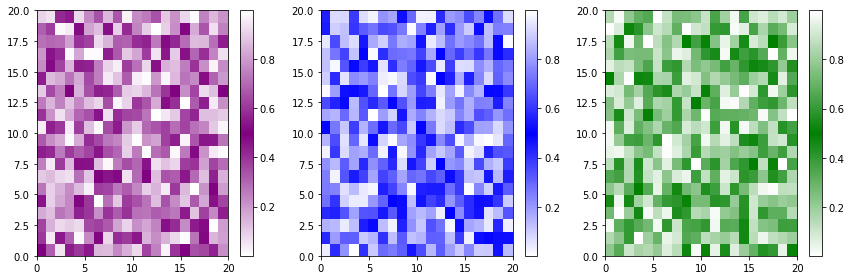

In [54]:
vmax = 1.0
cmap1 = LinearSegmentedColormap.from_list('mycmap', [(0 / vmax, 'white'),
                                                     (0.5 / vmax, 'purple'),
                                                     (1 / vmax, 'white')])
cmap2 = LinearSegmentedColormap.from_list('mycmap', [(0 / vmax, 'white'),
                                                     (0.5 / vmax, 'blue'),
                                                     (1 / vmax, 'white')])
cmap3 = LinearSegmentedColormap.from_list('mycmap', [(0 / vmax, 'white'),
                                                     (0.5 / vmax, 'green'),
                                                     (1 / vmax, 'white')])
fig, ax = plt.subplots(1,3, figsize = (12,4))
mesh1 = ax[0].pcolormesh(np.random.random((20,20)), cmap = cmap1)
cbar1 = fig.colorbar(mesh1, ax=ax[0])
mesh1 = ax[1].pcolormesh(np.random.random((20,20)), cmap = cmap2)
cbar1 = fig.colorbar(mesh1, ax=ax[1])
mesh1 = ax[2].pcolormesh(np.random.random((20,20)), cmap = cmap3)
cbar1 = fig.colorbar(mesh1, ax=ax[2])
fig.tight_layout()

In [55]:
purples = cmap1(np.linspace(0,1,7))
blues = cmap2(np.linspace(0,1,7))
greens = cmap3(np.linspace(0,1,7))

In [180]:
def compare(station, tmask):
    cast = casts[station['Station'].values[0]]
    Yind, Xind = geo_tools.find_closest_model_point(station['LonDecDeg'].values[0], 
                                                    station['LatDecDeg'].values[0],
                                                    X, Y, land_mask = bathy.mask)
    if station['Date'].values == 20170410:
        base=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthbase/testD/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
        testa=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa/test44/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
        testb=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsb/testd/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
    else: 
        base=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthbase/testI/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
        testa=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa/test99/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
        testb=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsb/testi/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
    shape_depth = cast.dCast['depth_m'].values.shape[0]
    if shape_depth > 11:
        fig, ax = plt.subplots(2,2,figsize = (8,10), gridspec_kw = {'height_ratios':[1, 2]} )
        deptht = cast.dCast['depth_m'].values
        cast_sal_down = cast.dCast['gsw_srA0'].values
        cast_sal_up = cast.uCast['gsw_srA0'].values
        cast_temp_down = cast.dCast['gsw_ctA0'].values
        cast_temp_up = cast.uCast['gsw_ctA0'].values
        ax[0,0].plot(cast_sal_down[:11], deptht[:11], 'r-', alpha = 0.6)
        ax[0,0].plot(cast_sal_up[:11], deptht[:11], color='deeppink', alpha = 0.6)
        ax[1,0].plot(cast_sal_down[11:], deptht[11:], 'r-', alpha = 0.6)
        ax[1,0].plot(cast_sal_up[11:], deptht[11:], color='deeppink', alpha = 0.6)
        ax[0,1].plot(cast_temp_down[:11], deptht[:11], 'r-', alpha = 0.6)
        ax[0,1].plot(cast_temp_up[:11], deptht[:11], color='deeppink', alpha = 0.6)
        ax[1,1].plot(cast_temp_down[11:], deptht[11:], 'r-', alpha = 0.6)
        ax[1,1].plot(cast_temp_up[11:], deptht[11:], color='deeppink', alpha = 0.6)
        if int(station['Time_UTC_hhmmss'].values[0][3:5]) < 30:
            delta = (30 + int(station['Time_UTC_hhmmss'].values[0][3:5])) / 60
            before = int(station['Time_UTC_hhmmss'].values[0][:2]) - 1
        else:
            delta = (int(station['Time_UTC_hhmmss'].values[0][3:5]) - 30) / 60
            before = int(station['Time_UTC_hhmmss'].values[0][:2])
        n = 1
        for j in range(Yind - 2, Yind + 3):
            pt_mask = tmask[0,:shape_depth,j,Xind]
            masked_depth = np.ma.masked_array(deptht, mask = 1-pt_mask)
            base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,j, Xind]
                                          + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,j, Xind],
                                          mask = 1-pt_mask)
            a_sal = np.ma.masked_array(delta*testa.variables['vosaline'][before,:shape_depth,j, Xind]
                                       +(1-delta)*testa.variables['vosaline'][before+1,:shape_depth,j,Xind], 
                                       mask = 1-pt_mask)
            b_sal = np.ma.masked_array(delta*testb.variables['vosaline'][before,:shape_depth,j, Xind]
                                       +(1-delta)*testb.variables['vosaline'][before+1,:shape_depth,j,Xind], 
                                       mask = 1-pt_mask)
            base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,j, Xind]
                                           +(1-delta)*base.variables['votemper'][before+1,:shape_depth,j,Xind], 
                                           mask = 1-pt_mask)
            a_temp = np.ma.masked_array(delta*testa.variables['votemper'][before,:shape_depth,j, Xind]
                                        +(1-delta)*testa.variables['votemper'][before+1,:shape_depth,j,Xind], 
                                        mask = 1-pt_mask)
            b_temp = np.ma.masked_array(delta*testb.variables['votemper'][before,:shape_depth,j, Xind]
                                        +(1-delta)*testb.variables['votemper'][before+1,:shape_depth,j,Xind], 
                                        mask = 1-pt_mask)
            ax[0,0].plot(base_sal[:11], deptht[:11], color = purples[n], alpha = 0.6)
            ax[0,0].plot(a_sal[:11], deptht[:11], color = blues[n], alpha = 0.6)
            ax[0,0].plot(b_sal[:11], deptht[:11], color= greens[n], alpha = 0.6)
            ax[1,0].plot(base_sal[11:], deptht[11:], color = purples[n], alpha = 0.6)
            ax[1,0].plot(a_sal[11:], deptht[11:], color = blues[n], alpha = 0.6)
            ax[1,0].plot(b_sal[11:], deptht[11:], color= greens[n], alpha = 0.6)
            ax[0,1].plot(base_temp[:11], deptht[:11], color = purples[n], alpha = 0.6)
            ax[0,1].plot(a_temp[:11], deptht[:11], color = blues[n], alpha = 0.6)
            ax[0,1].plot(b_temp[:11], deptht[:11], color = greens[n], alpha = 0.6)
            ax[1,1].plot(base_temp[11:], deptht[11:], color = purples[n], alpha = 0.6)
            ax[1,1].plot(a_temp[11:], deptht[11:], color = blues[n], alpha = 0.6)
            ax[1,1].plot(b_temp[11:], deptht[11:], color = greens[n], alpha = 0.6)
            n = n + 1
        m = 1
        for i in range(Xind - 2, Xind + 3):
            pt_mask = tmask[0,:shape_depth,Yind,i]
            masked_depth = np.ma.masked_array(deptht, mask = 1-pt_mask)
            base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,Yind, i]
                                          + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,Yind, i],
                                          mask = 1-pt_mask)
            a_sal = np.ma.masked_array(delta*testa.variables['vosaline'][before,:shape_depth,Yind, i]
                                       +(1-delta)*testa.variables['vosaline'][before+1,:shape_depth,Yind,i], 
                                       mask = 1-pt_mask)
            b_sal = np.ma.masked_array(delta*testb.variables['vosaline'][before,:shape_depth,Yind, i]
                                       +(1-delta)*testb.variables['vosaline'][before+1,:shape_depth,Yind,i], 
                                       mask = 1-pt_mask)
            base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,Yind, i]
                                           +(1-delta)*base.variables['votemper'][before+1,:shape_depth,Yind,i], 
                                           mask = 1-pt_mask)
            a_temp = np.ma.masked_array(delta*testa.variables['votemper'][before,:shape_depth,Yind, i]
                                        +(1-delta)*testa.variables['votemper'][before+1,:shape_depth,Yind,i], 
                                        mask = 1-pt_mask)
            b_temp = np.ma.masked_array(delta*testb.variables['votemper'][before,:shape_depth,Yind, i]
                                        +(1-delta)*testb.variables['votemper'][before+1,:shape_depth,Yind,i], 
                                        mask = 1-pt_mask)
            ax[0,0].plot(base_sal[:11], deptht[:11], color = purples[m], alpha = 0.6)
            ax[0,0].plot(a_sal[:11], deptht[:11], color = blues[m], alpha = 0.6)
            ax[0,0].plot(b_sal[:11], deptht[:11], color= greens[m], alpha = 0.6)
            ax[1,0].plot(base_sal[11:], deptht[11:], color = purples[m], alpha = 0.6)
            ax[1,0].plot(a_sal[11:], deptht[11:], color = blues[m], alpha = 0.6)
            ax[1,0].plot(b_sal[11:], deptht[11:], color= greens[m], alpha = 0.6)
            ax[0,1].plot(base_temp[:11], deptht[:11], color = purples[m], alpha = 0.6)
            ax[0,1].plot(a_temp[:11], deptht[:11], color = blues[m], alpha = 0.6)
            ax[0,1].plot(b_temp[:11], deptht[:11], color = greens[m], alpha = 0.6)
            ax[1,1].plot(base_temp[11:], deptht[11:], color = purples[m], alpha = 0.6)
            ax[1,1].plot(a_temp[11:], deptht[11:], color = blues[m], alpha = 0.6)
            ax[1,1].plot(b_temp[11:], deptht[11:], color = greens[m], alpha = 0.6)
            m = m + 1
    else:
        fig, ax = plt.subplots(1,2,figsize = (8,10) )
        deptht = cast.uCast['depth_m'].values
        cast_sal_down = cast.dCast['gsw_srA0'].values
        cast_sal_up = cast.uCast['gsw_srA0'].values
        cast_temp_down = cast.dCast['gsw_ctA0'].values
        cast_temp_up = cast.uCast['gsw_ctA0'].values
        ax[0].plot(cast_sal_down[:], deptht[:], 'r-', alpha = 0.6)
        ax[0].plot(cast_sal_up[:], deptht[:], color='deeppink', alpha = 0.6)
        ax[1].plot(cast_temp_down[:], deptht[:], 'r-', alpha = 0.6)
        ax[1].plot(cast_temp_up[:], deptht[:], color='deeppink', alpha = 0.6)
        if int(stationdata.iloc[[2]]['Time_UTC_hhmmss'].values[0][3:5]) < 30:
            delta = (30 + int(stationdata.iloc[[2]]['Time_UTC_hhmmss'].values[0][3:5])) / 60
            before = int(stationdata.iloc[[2]]['Time_UTC_hhmmss'].values[0][:2]) - 1
        else:
            delta = (int(stationdata.iloc[[2]]['Time_UTC_hhmmss'].values[0][3:5]) - 30) / 60
            before = int(stationdata.iloc[[2]]['Time_UTC_hhmmss'].values[0][:2])
        n = 1
        for j in range(Yind - 2, Yind + 3):
            pt_mask = tmask[0,:shape_depth,j,Xind]
            masked_depth = np.ma.masked_array(deptht[:shape_depth], mask = 1-pt_mask)
            base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,j, Xind]
                                          + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,j, Xind],
                                          mask = 1-pt_mask)
            a_sal = np.ma.masked_array(delta*testa.variables['vosaline'][before,:shape_depth,j, Xind]
                                       +(1-delta)*testa.variables['vosaline'][before+1,:shape_depth,j,Xind], 
                                       mask = 1-pt_mask)
            b_sal = np.ma.masked_array(delta*testb.variables['vosaline'][before,:shape_depth,j, Xind]
                                       +(1-delta)*testb.variables['vosaline'][before+1,:shape_depth,j,Xind], 
                                       mask = 1-pt_mask)
            base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,j, Xind]
                                           +(1-delta)*base.variables['votemper'][before+1,:shape_depth,j,Xind], 
                                           mask = 1-pt_mask)
            a_temp = np.ma.masked_array(delta*testa.variables['votemper'][before,:shape_depth,j, Xind]
                                        +(1-delta)*testa.variables['votemper'][before+1,:shape_depth,j,Xind], 
                                        mask = 1-pt_mask)
            b_temp = np.ma.masked_array(delta*testb.variables['votemper'][before,:shape_depth,j, Xind]
                                        +(1-delta)*testb.variables['votemper'][before+1,:shape_depth,j,Xind], 
                                        mask = 1-pt_mask)
            ax[0].plot(base_sal, deptht, color = purples[n], alpha = 0.6)
            ax[0].plot(a_sal, deptht, color = blues[n], alpha = 0.6)
            ax[0].plot(b_sal, deptht, color= greens[n], alpha = 0.6)
            ax[1].plot(base_temp, deptht, color = purples[n], alpha = 0.6)
            ax[1].plot(a_temp, deptht, color = blues[n], alpha = 0.6)
            ax[1].plot(b_temp, deptht, color = greens[n], alpha = 0.6)
            n = n + 1
        m = 1
        for i in range(Xind - 2, Xind + 3):
            pt_mask = tmask[0,:shape_depth,Yind,i]
            masked_depth = np.ma.masked_array(deptht[:shape_depth], mask = 1-pt_mask)
            base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,Yind, i]
                                          + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,Yind, i],
                                          mask = 1-pt_mask)
            a_sal = np.ma.masked_array(delta*testa.variables['vosaline'][before,:shape_depth,Yind, i]
                                       +(1-delta)*testa.variables['vosaline'][before+1,:shape_depth,Yind,i], 
                                       mask = 1-pt_mask)
            b_sal = np.ma.masked_array(delta*testb.variables['vosaline'][before,:shape_depth,Yind, i]
                                       +(1-delta)*testb.variables['vosaline'][before+1,:shape_depth,Yind,i], 
                                       mask = 1-pt_mask)
            base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,Yind, i]
                                           +(1-delta)*base.variables['votemper'][before+1,:shape_depth,Yind,i], 
                                           mask = 1-pt_mask)
            a_temp = np.ma.masked_array(delta*testa.variables['votemper'][before,:shape_depth,Yind, i]
                                        +(1-delta)*testa.variables['votemper'][before+1,:shape_depth,Yind,i], 
                                        mask = 1-pt_mask)
            b_temp = np.ma.masked_array(delta*testb.variables['votemper'][before,:shape_depth,Yind, i]
                                        +(1-delta)*testb.variables['votemper'][before+1,:shape_depth,Yind,i], 
                                        mask = 1-pt_mask)
            ax[0].plot(base_sal, masked_depth, color = purples[m], alpha = 0.6)
            ax[0].plot(a_sal, masked_depth, color = blues[m], alpha = 0.6)
            ax[0].plot(b_sal, masked_depth, color= greens[m], alpha = 0.6)
            ax[1].plot(base_temp, masked_depth, color = purples[m], alpha = 0.6)
            ax[1].plot(a_temp, masked_depth, color = blues[m], alpha = 0.6)
            ax[1].plot(b_temp, masked_depth, color = greens[m], alpha = 0.6)
            m = m + 1
    min_sal = np.nanmin(np.array([np.nanmin(cast_sal_up), np.nanmin(cast_sal_down), 
                                  np.nanmin(base_sal), np.nanmin(a_sal), np.nanmin(b_sal)]))
    max_sal = np.nanmax(np.array([np.nanmax(cast_sal_up), np.nanmax(cast_sal_down), 
                                  np.nanmax(base_sal), np.nanmax(a_sal), np.nanmax(b_sal)]))
    min_temp = np.nanmin(np.array([np.nanmin(cast_temp_up), np.nanmin(cast_temp_down), 
                                 np.nanmin(base_temp),np.nanmin(a_temp), np.nanmin(b_temp)]))
    max_temp = np.nanmax(np.array([np.nanmax(cast_temp_up), np.nanmax(cast_temp_down), 
                                 np.nanmax(base_temp),np.nanmax(a_temp), np.nanmax(b_temp)]))
    if shape_depth > 11:
        ax[0,0].set_ylim(11,0)
        ax[0,1].set_ylim(11,0)
        ax[1,0].set_ylim(100,12)
        ax[1,1].set_ylim(100,12)
        ax[0,0].set_xlim(min_sal-1,max_sal+1)
        ax[0,1].set_xlim(min_temp-0.5,max_temp+0.5)
        ax[1,0].set_xlim(min_sal-1,max_sal+1)
        ax[1,1].set_xlim(min_temp-0.5,max_temp+0.5)
        ax[0,0].set_title('Salinity, Station ' + str(station['Station'].values[0]))
        ax[0,1].set_title('Temperature, Station ' + str(station['Station'].values[0]))
        ax[0,0].tick_params(labelbottom='off')
        ax[0,1].tick_params(labelbottom='off')
        ax[0,0].grid('on')
        ax[0,1].grid('on')
        ax[1,0].grid('on')
        ax[1,1].grid('on')
    else:
        ax[0].set_ylim(11,0)
        ax[1].set_ylim(11,0)
        ax[0].set_xlim(min_sal-1,max_sal+1)
        ax[1].set_xlim(min_temp-0.5,max_temp+0.5)
        ax[0].set_title('Salinity, Station ' + str(station['Station'].values[0]))
        ax[1].set_title('Temperature, Station ' + str(station['Station'].values[0]))
        ax[0].grid('on')
        ax[1].grid('on')
    fig.tight_layout()
    return ax

In [191]:
def compare_closest(station, tmask):
    cast = casts[station['Station'].values[0]]
    Yind, Xind = geo_tools.find_closest_model_point(station['LonDecDeg'].values[0], 
                                                    station['LatDecDeg'].values[0],
                                                    X, Y, land_mask = bathy.mask)
    if station['Date'].values == 20170410:
        base=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthbase/testD/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
        testa=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa/test44/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
        testb=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsb/testd/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
    else: 
        base=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthbase/testI/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
        testa=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa/test99/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
        testb=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsb/testi/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
    shape_depth = cast.dCast['depth_m'].values.shape[0]
    if shape_depth > 11:
        fig, ax = plt.subplots(2,2,figsize = (8,10), gridspec_kw = {'height_ratios':[1, 2]} )
        deptht = cast.dCast['depth_m'].values
        cast_sal_down = cast.dCast['gsw_srA0'].values
        cast_sal_up = cast.uCast['gsw_srA0'].values
        cast_temp_down = cast.dCast['gsw_ctA0'].values
        cast_temp_up = cast.uCast['gsw_ctA0'].values
        ax[0,0].plot(cast_sal_down[:11], deptht[:11], 'r-', alpha = 0.6)
        ax[0,0].plot(cast_sal_up[:11], deptht[:11], color='deeppink', alpha = 0.6)
        ax[1,0].plot(cast_sal_down[11:], deptht[11:], 'r-', alpha = 0.6)
        ax[1,0].plot(cast_sal_up[11:], deptht[11:], color='deeppink', alpha = 0.6)
        ax[0,1].plot(cast_temp_down[:11], deptht[:11], 'r-', alpha = 0.6)
        ax[0,1].plot(cast_temp_up[:11], deptht[:11], color='deeppink', alpha = 0.6)
        ax[1,1].plot(cast_temp_down[11:], deptht[11:], 'r-', alpha = 0.6)
        ax[1,1].plot(cast_temp_up[11:], deptht[11:], color='deeppink', alpha = 0.6)
        if int(stationdata.iloc[[2]]['Time_UTC_hhmmss'].values[0][3:5]) < 30:
            delta = (30 + int(station['Time_UTC_hhmmss'].values[0][3:5])) / 60
            before = int(station['Time_UTC_hhmmss'].values[0][:2]) - 1
        else:
            delta = (int(station['Time_UTC_hhmmss'].values[0][3:5]) - 30) / 60
            before = int(station['Time_UTC_hhmmss'].values[0][:2])
        pt_mask = tmask[0,:shape_depth,Yind,Xind]
        masked_depth = np.ma.masked_array(deptht, mask = 1-pt_mask)
        base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,Yind, Xind]
                                      + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,Yind, Xind],
                                      mask = 1-pt_mask)
        a_sal = np.ma.masked_array(delta*testa.variables['vosaline'][before,:shape_depth,Yind, Xind]
                                   +(1-delta)*testa.variables['vosaline'][before+1,:shape_depth,Yind,Xind], 
                                   mask = 1-pt_mask)
        b_sal = np.ma.masked_array(delta*testb.variables['vosaline'][before,:shape_depth,Yind, Xind]
                                   +(1-delta)*testb.variables['vosaline'][before+1,:shape_depth,Yind,Xind], 
                                   mask = 1-pt_mask)
        base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,Yind, Xind]
                                       +(1-delta)*base.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                       mask = 1-pt_mask)
        a_temp = np.ma.masked_array(delta*testa.variables['votemper'][before,:shape_depth,Yind, Xind]
                                    +(1-delta)*testa.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                    mask = 1-pt_mask)
        b_temp = np.ma.masked_array(delta*testb.variables['votemper'][before,:shape_depth,Yind, Xind]
                                    +(1-delta)*testb.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                    mask = 1-pt_mask)
        ax[0,0].plot(base_sal[:11], deptht[:11], color = 'purple', alpha = 0.6)
        ax[0,0].plot(a_sal[:11], deptht[:11], color = 'blue', alpha = 0.6)
        ax[0,0].plot(b_sal[:11], deptht[:11], color= 'green', alpha = 0.6)
        ax[1,0].plot(base_sal[11:], deptht[11:], color = 'purple', alpha = 0.6)
        ax[1,0].plot(a_sal[11:], deptht[11:], color = 'blue', alpha = 0.6)
        ax[1,0].plot(b_sal[11:], deptht[11:], color= 'green', alpha = 0.6)
        ax[0,1].plot(base_temp[:11], deptht[:11], color = 'purple', alpha = 0.6)
        ax[0,1].plot(a_temp[:11], deptht[:11], color = 'blue', alpha = 0.6)
        ax[0,1].plot(b_temp[:11], deptht[:11], color = 'green', alpha = 0.6)
        ax[1,1].plot(base_temp[11:], deptht[11:], color = 'purple', alpha = 0.6)
        ax[1,1].plot(a_temp[11:], deptht[11:], color = 'blue', alpha = 0.6)
        ax[1,1].plot(b_temp[11:], deptht[11:], color = 'green', alpha = 0.6)
    else:
        fig, ax = plt.subplots(1,2,figsize = (8,10) )
        deptht = cast.uCast['depth_m'].values
        cast_sal_down = cast.dCast['gsw_srA0'].values
        cast_sal_up = cast.uCast['gsw_srA0'].values
        cast_temp_down = cast.dCast['gsw_ctA0'].values
        cast_temp_up = cast.uCast['gsw_ctA0'].values
        ax[0].plot(cast_sal_down[:], deptht[:], 'r-', alpha = 0.6)
        ax[0].plot(cast_sal_up[:], deptht[:], color='deeppink', alpha = 0.6)
        ax[1].plot(cast_temp_down[:], deptht[:], 'r-', alpha = 0.6)
        ax[1].plot(cast_temp_up[:], deptht[:], color='deeppink', alpha = 0.6)
        if int(stationdata.iloc[[2]]['Time_UTC_hhmmss'].values[0][3:5]) < 30:
            delta = (30 + int(stationdata.iloc[[2]]['Time_UTC_hhmmss'].values[0][3:5])) / 60
            before = int(stationdata.iloc[[2]]['Time_UTC_hhmmss'].values[0][:2]) - 1
        else:
            delta = (int(stationdata.iloc[[2]]['Time_UTC_hhmmss'].values[0][3:5]) - 30) / 60
            before = int(stationdata.iloc[[2]]['Time_UTC_hhmmss'].values[0][:2])
        pt_mask = tmask[0,:shape_depth,Yind,Xind]
        masked_depth = np.ma.masked_array(deptht[:shape_depth], mask = 1-pt_mask)
        base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,Yind, Xind]
                                      + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,Yind, Xind],
                                      mask = 1-pt_mask)
        a_sal = np.ma.masked_array(delta*testa.variables['vosaline'][before,:shape_depth,Yind, Xind]
                                   +(1-delta)*testa.variables['vosaline'][before+1,:shape_depth,Yind,Xind], 
                                   mask = 1-pt_mask)
        b_sal = np.ma.masked_array(delta*testb.variables['vosaline'][before,:shape_depth,Yind, Xind]
                                   +(1-delta)*testb.variables['vosaline'][before+1,:shape_depth,Yind,Xind], 
                                   mask = 1-pt_mask)
        base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,Yind, Xind]
                                       +(1-delta)*base.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                       mask = 1-pt_mask)
        a_temp = np.ma.masked_array(delta*testa.variables['votemper'][before,:shape_depth,Yind, Xind]
                                    +(1-delta)*testa.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                    mask = 1-pt_mask)
        b_temp = np.ma.masked_array(delta*testb.variables['votemper'][before,:shape_depth,Yind, Xind]
                                    +(1-delta)*testb.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                    mask = 1-pt_mask)
        ax[0].plot(base_sal, deptht, color = 'purple', alpha = 0.6)
        ax[0].plot(a_sal, deptht, color = 'blue', alpha = 0.6)
        ax[0].plot(b_sal, deptht, color= 'green', alpha = 0.6)
        ax[1].plot(base_temp, deptht, color = 'purple', alpha = 0.6)
        ax[1].plot(a_temp, deptht, color = 'blue', alpha = 0.6)
        ax[1].plot(b_temp, deptht, color = 'green', alpha = 0.6)
    min_sal = np.nanmin(np.array([np.nanmin(cast_sal_up), np.nanmin(cast_sal_down), 
                                  np.nanmin(base_sal), np.nanmin(a_sal), np.nanmin(b_sal)]))
    max_sal = np.nanmax(np.array([np.nanmax(cast_sal_up), np.nanmax(cast_sal_down), 
                                  np.nanmax(base_sal), np.nanmax(a_sal), np.nanmax(b_sal)]))
    min_temp = np.nanmin(np.array([np.nanmin(cast_temp_up), np.nanmin(cast_temp_down), 
                                 np.nanmin(base_temp),np.nanmin(a_temp), np.nanmin(b_temp)]))
    max_temp = np.nanmax(np.array([np.nanmax(cast_temp_up), np.nanmax(cast_temp_down), 
                                 np.nanmax(base_temp),np.nanmax(a_temp), np.nanmax(b_temp)]))
    if shape_depth > 11:
        ax[0,0].set_ylim(11,0)
        ax[0,1].set_ylim(11,0)
        ax[1,0].set_ylim(100,12)
        ax[1,1].set_ylim(100,12)
        ax[0,0].set_xlim(min_sal-1,max_sal+1)
        ax[0,1].set_xlim(min_temp-0.5,max_temp+0.5)
        ax[1,0].set_xlim(min_sal-1,max_sal+1)
        ax[1,1].set_xlim(min_temp-0.5,max_temp+0.5)
        ax[0,0].set_title('Salinity, Station ' + str(station['Station'].values[0]))
        ax[0,1].set_title('Temperature, Station ' + str(station['Station'].values[0]))
        ax[0,0].tick_params(labelbottom='off')
        ax[0,1].tick_params(labelbottom='off')
        ax[0,0].grid('on')
        ax[0,1].grid('on')
        ax[1,0].grid('on')
        ax[1,1].grid('on')
    else:
        ax[0].set_ylim(11,0)
        ax[1].set_ylim(11,0)
        ax[0].set_xlim(min_sal-1,max_sal+1)
        ax[1].set_xlim(min_temp-0.5,max_temp+0.5)
        ax[0].set_title('Salinity, Station ' + str(station['Station'].values[0]))
        ax[1].set_title('Temperature, Station ' + str(station['Station'].values[0]))
        ax[0].grid('on')
        ax[1].grid('on')
    fig.tight_layout()
    return ax

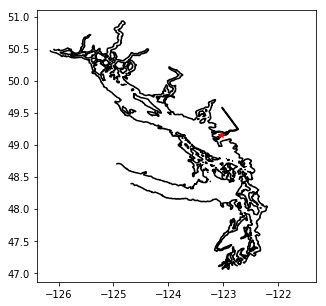

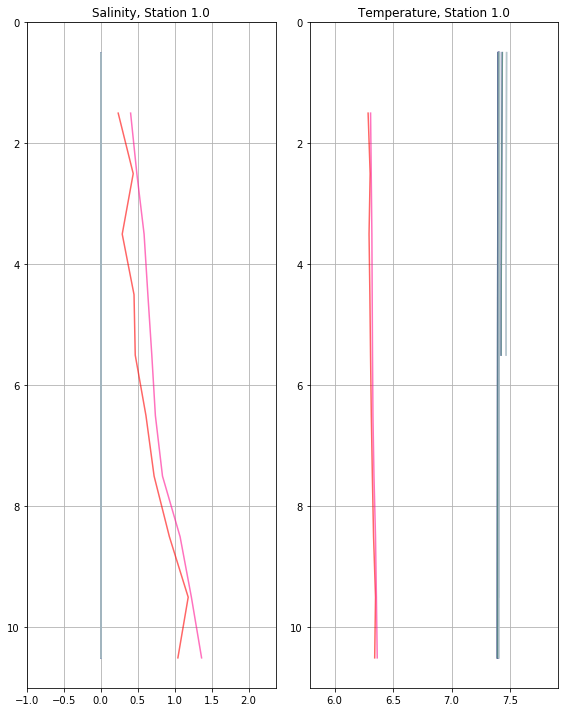

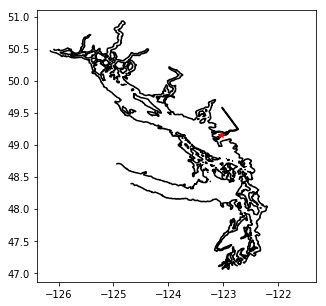

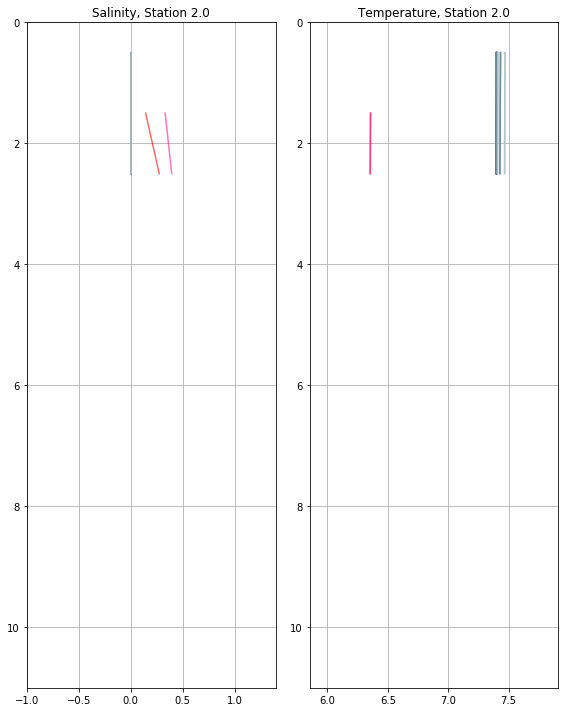

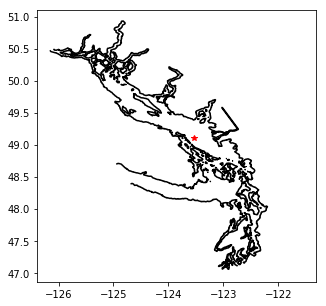

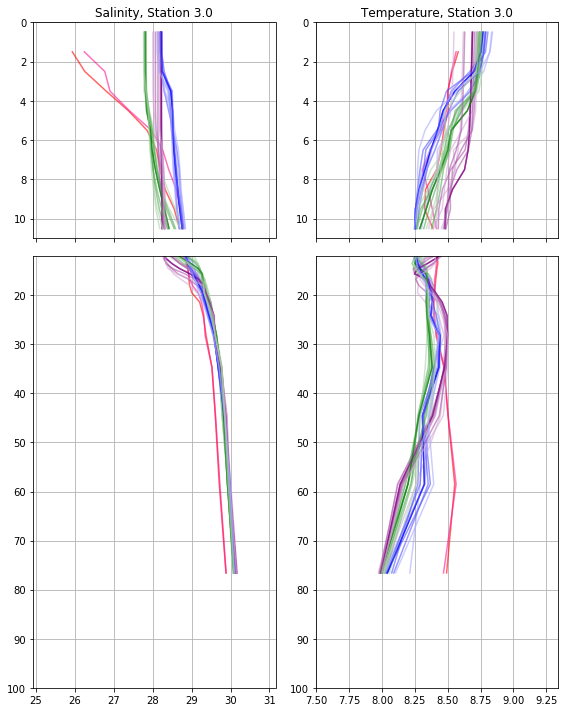

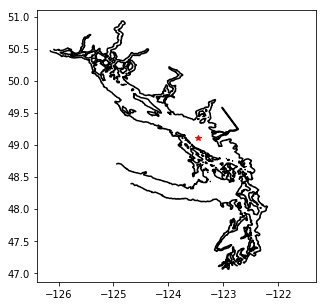

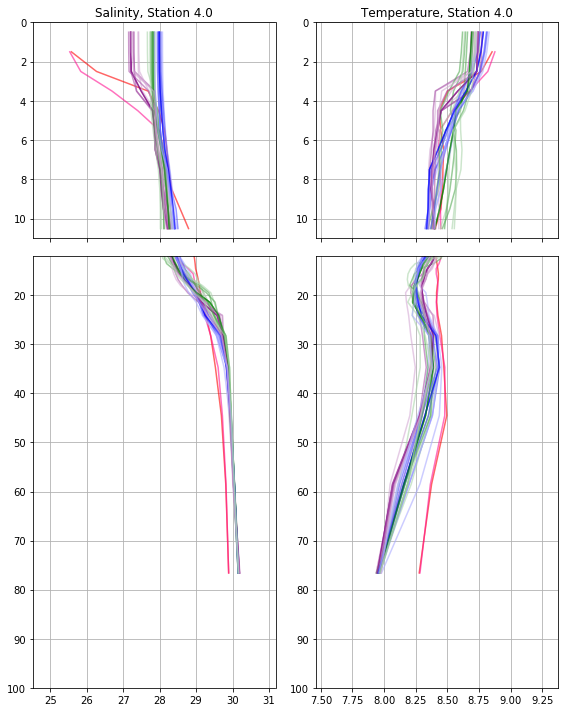

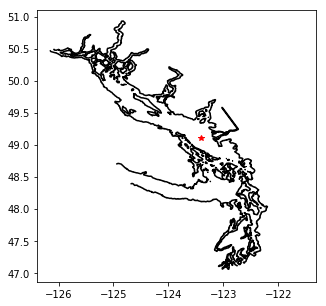

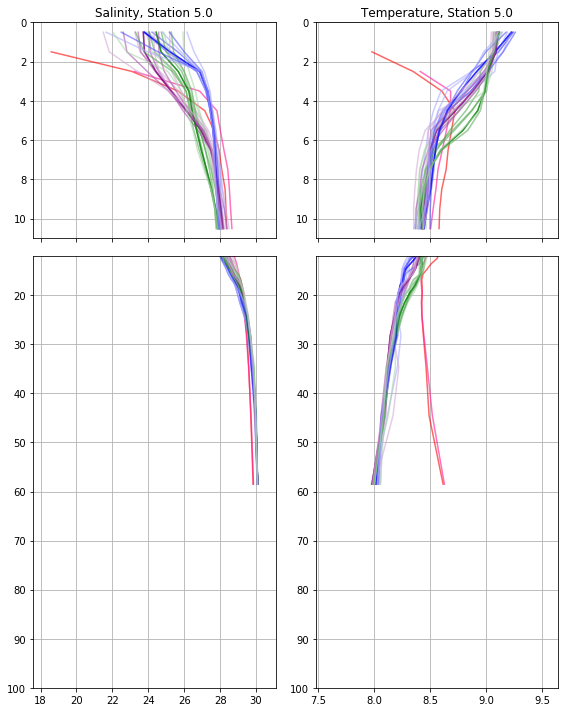

In [182]:
for n in range(5):
    where(stationdata.iloc[[n]]);
    compare(stationdata.iloc[[n]], tmask);

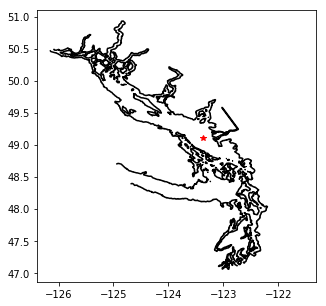

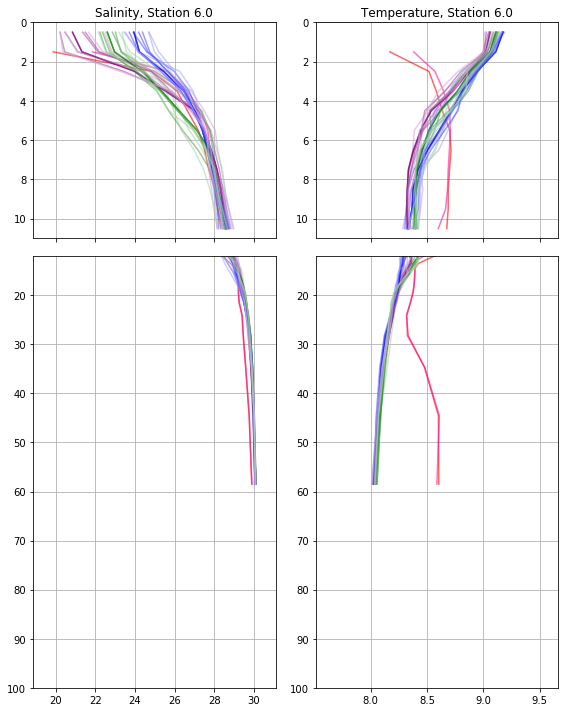

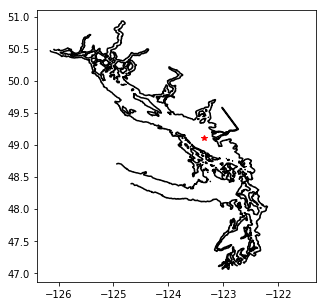

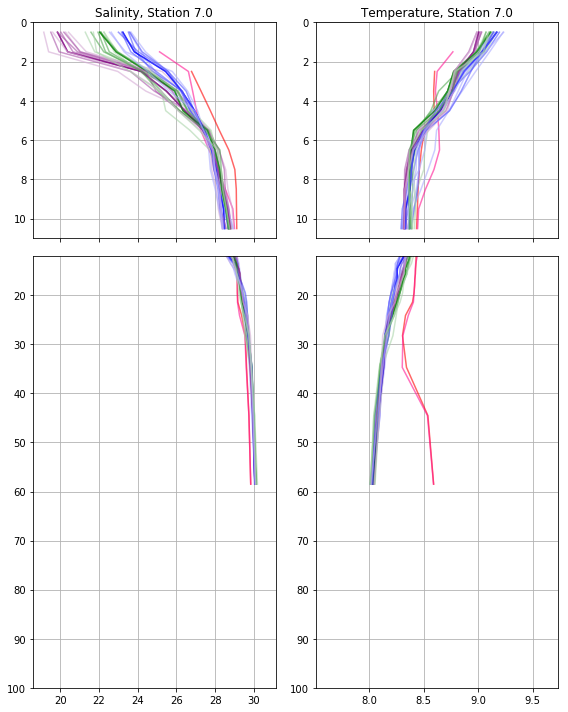

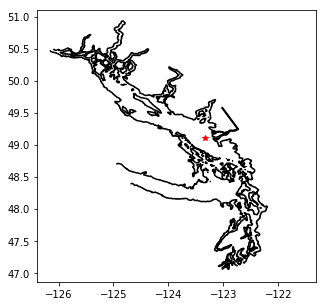

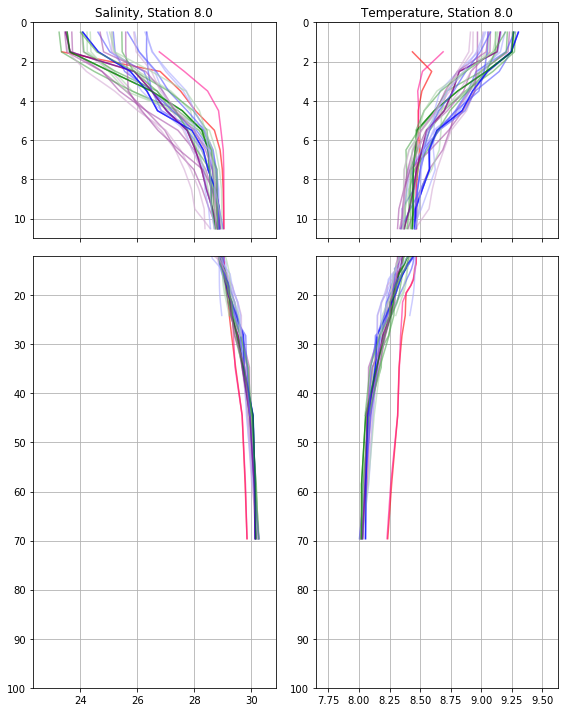

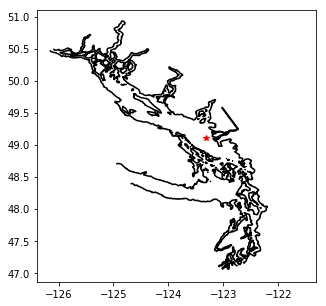

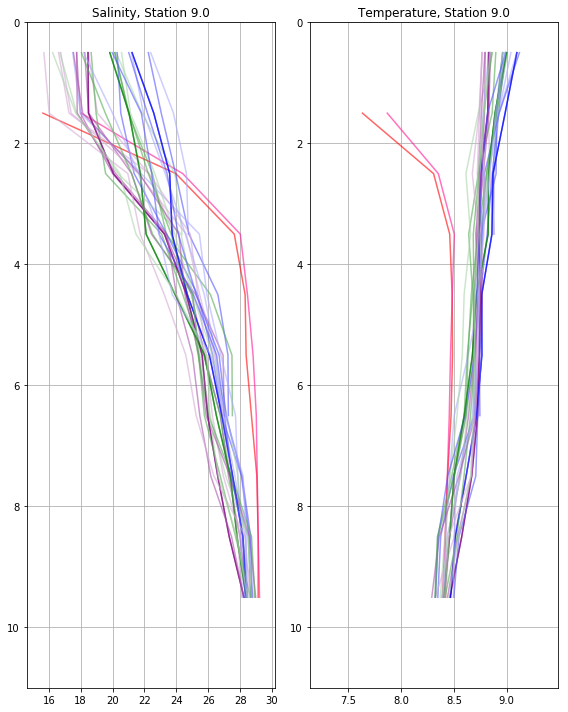

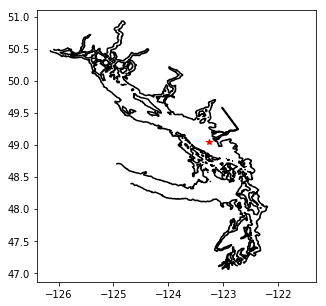

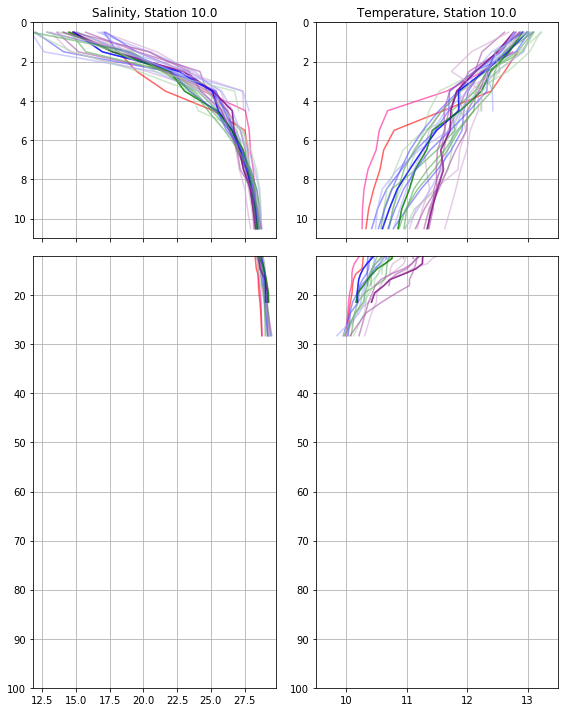

In [183]:
for n in range(5,10):
    where(stationdata.iloc[[n]]);
    compare(stationdata.iloc[[n]], tmask);

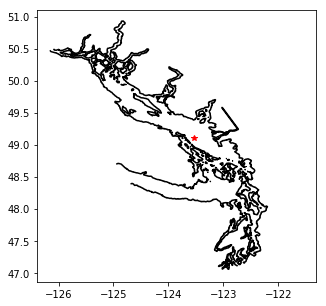

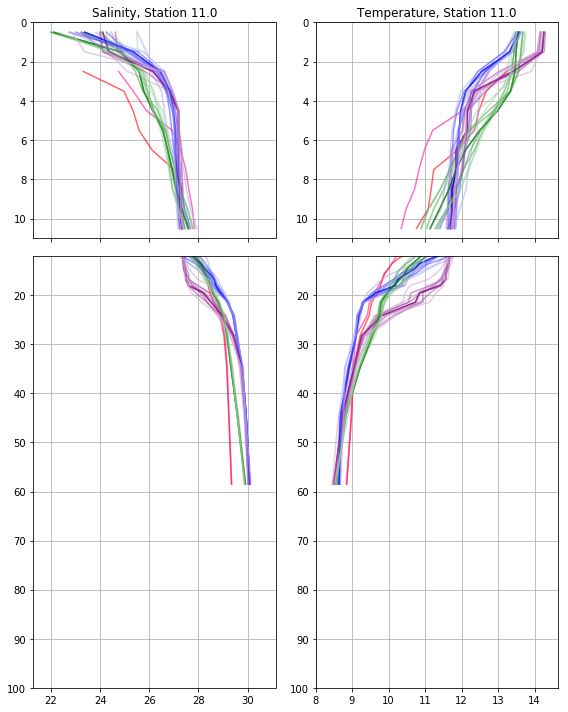

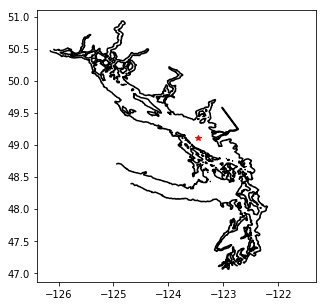

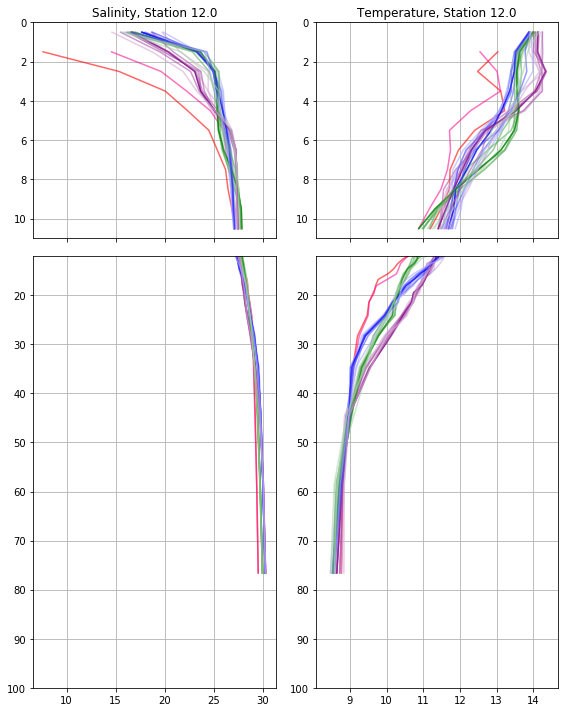

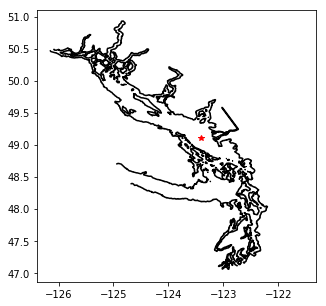

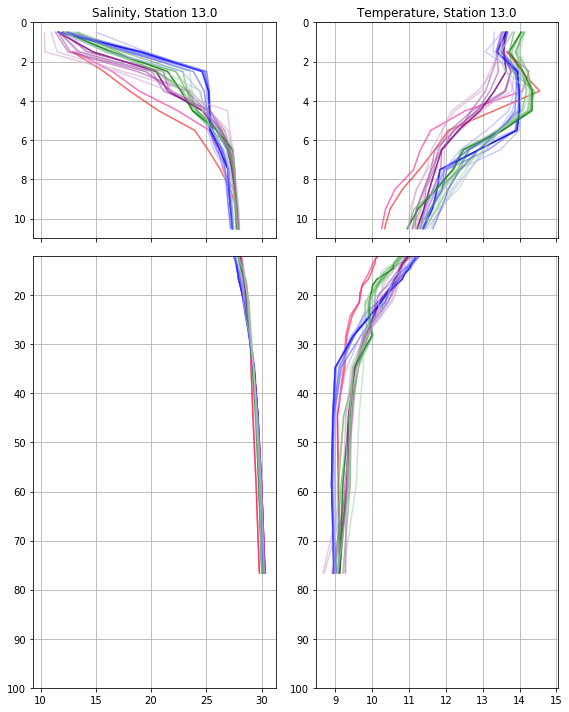

In [184]:
for n in range(10,13):
    where(stationdata.iloc[[n]]);
    compare(stationdata.iloc[[n]], tmask);

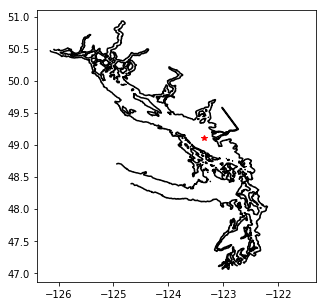

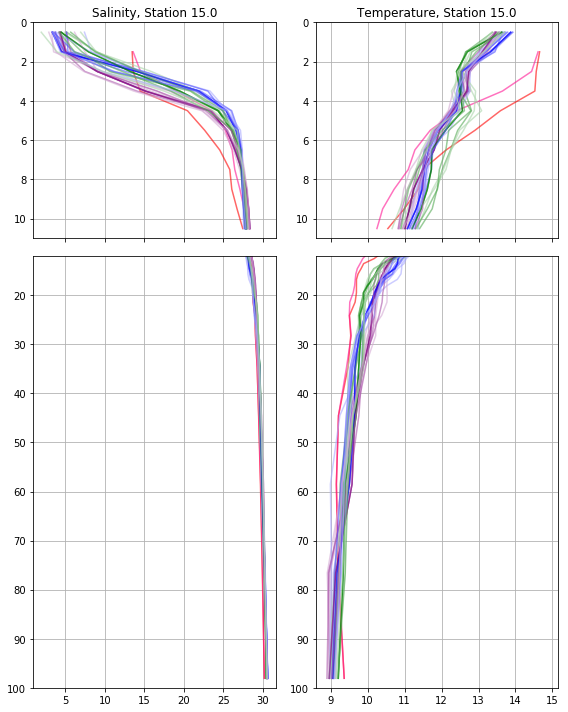

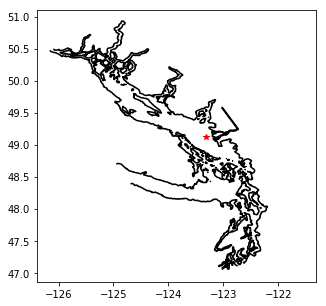

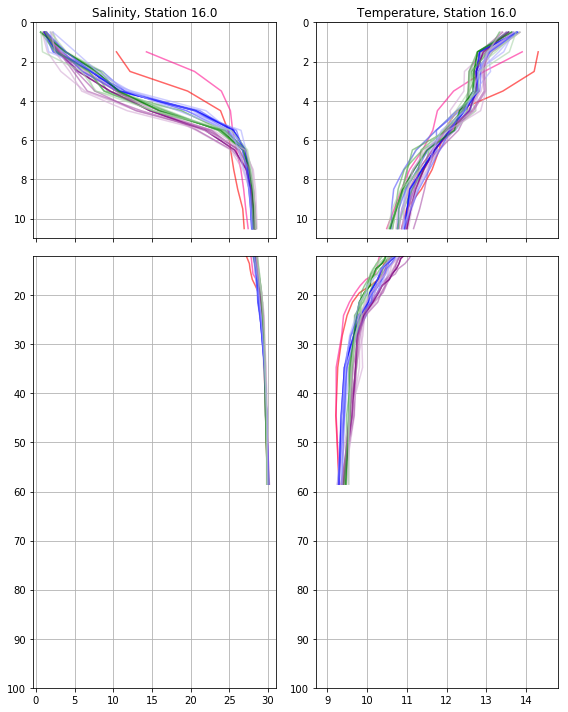

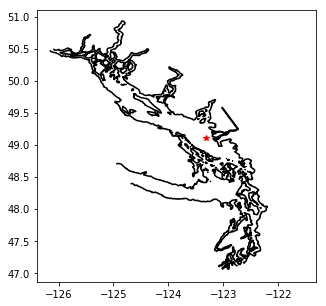

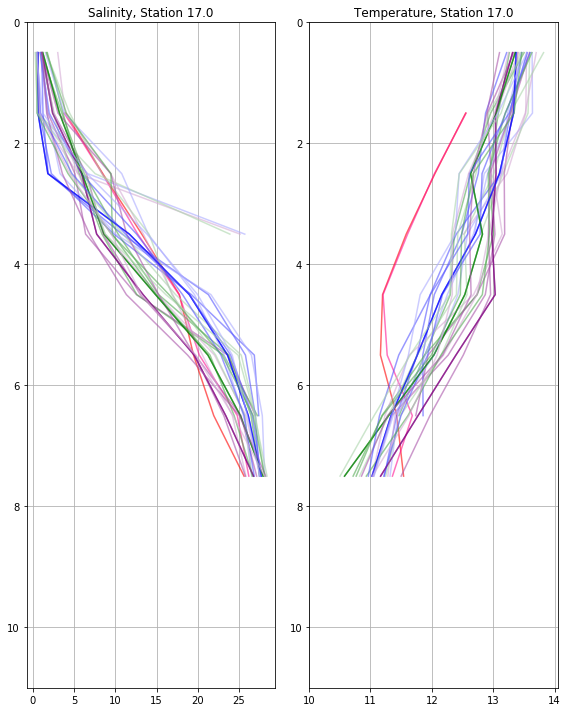

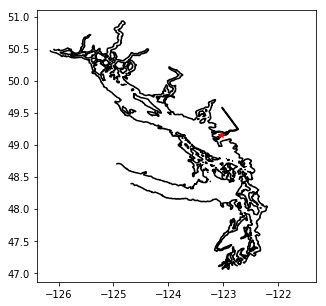

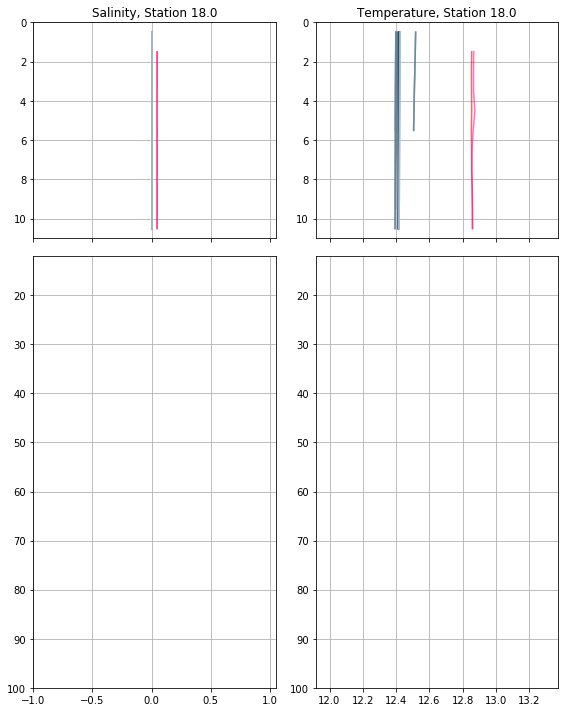

In [185]:
for n in range(15,19):
    where(stationdata.iloc[[n]]);
    compare(stationdata.iloc[[n]], tmask);

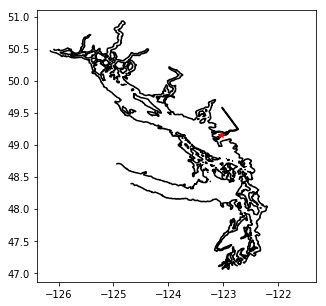

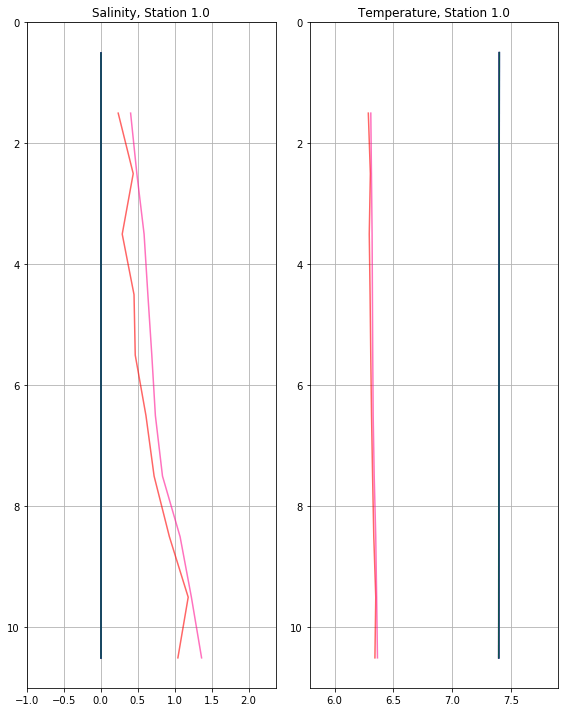

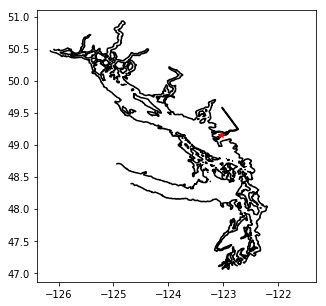

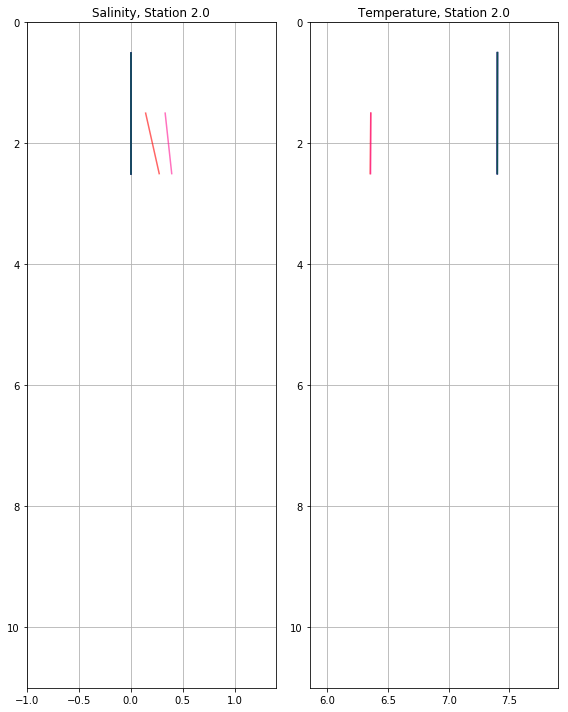

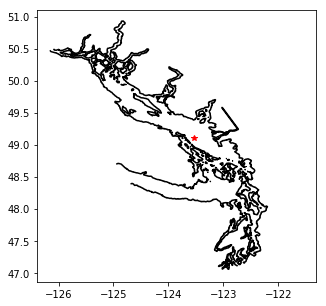

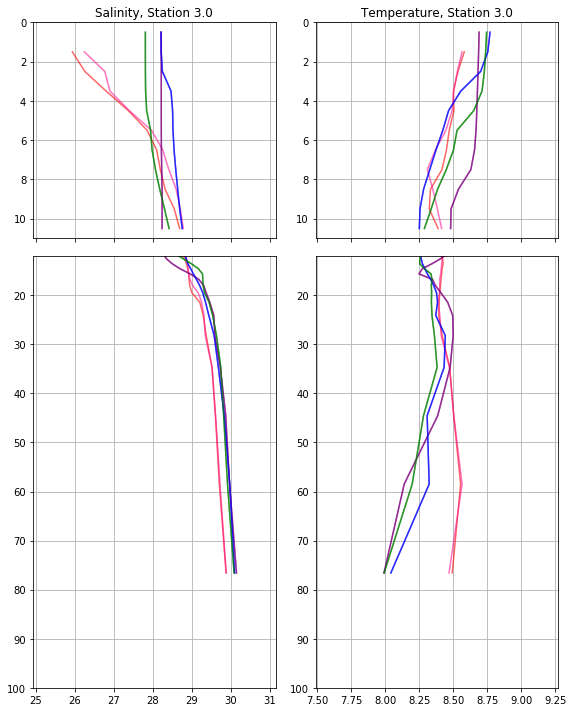

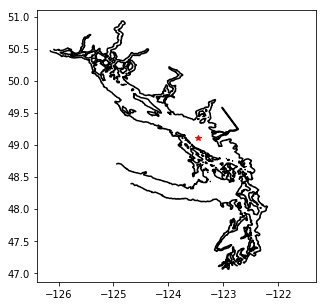

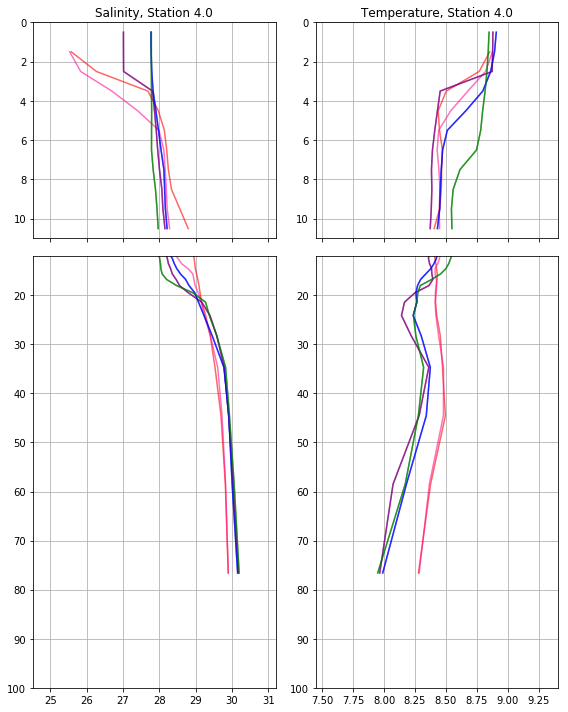

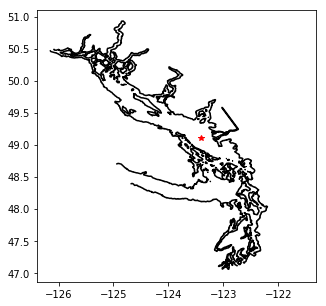

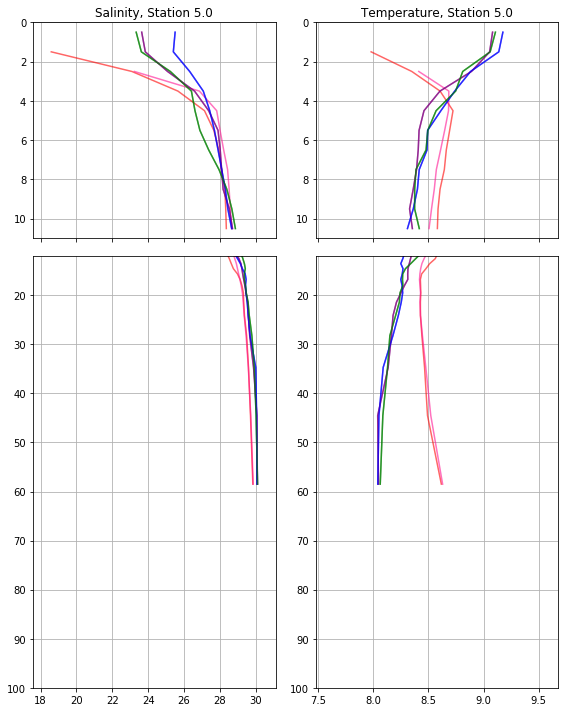

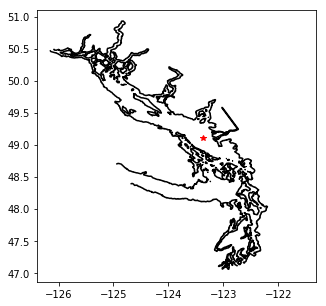

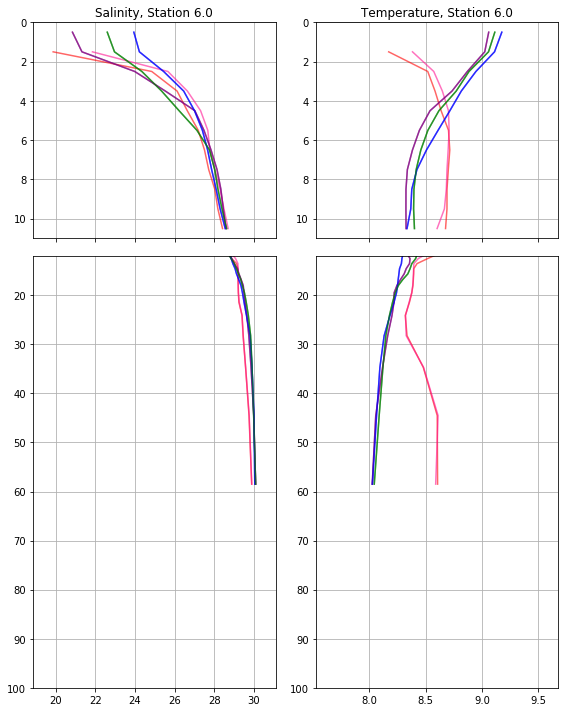

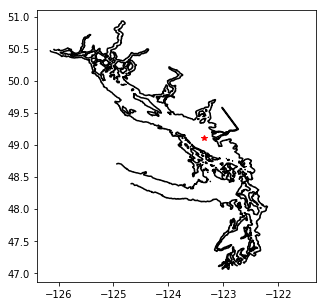

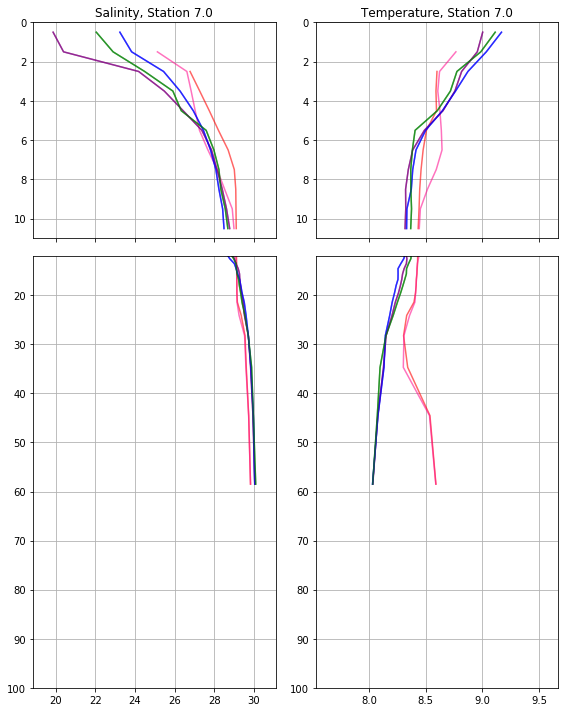

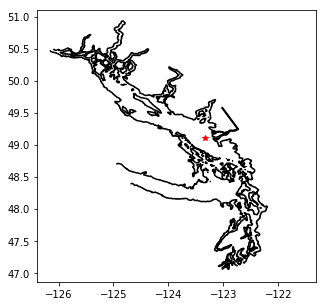

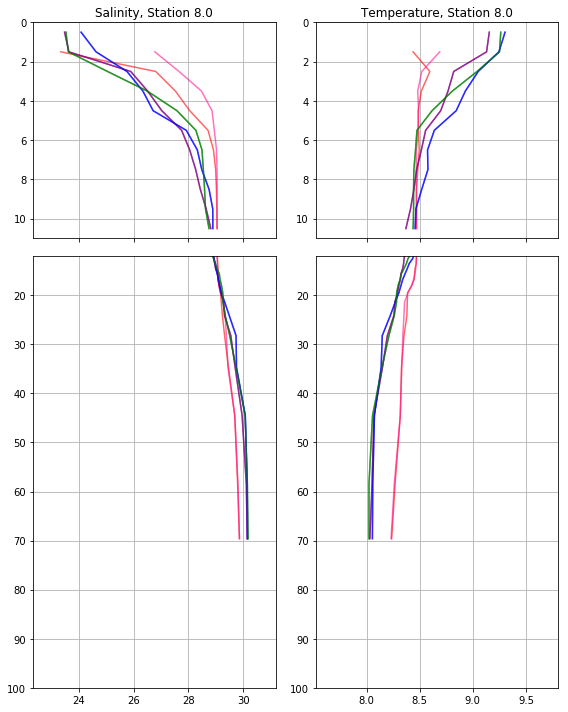

In [186]:
for n in range(8):
    where(stationdata.iloc[[n]]);
    compare_closest(stationdata.iloc[[n]], tmask);

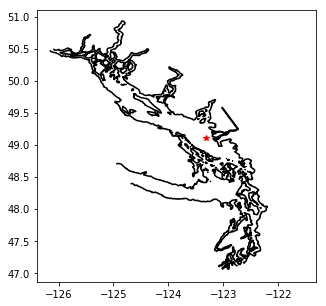

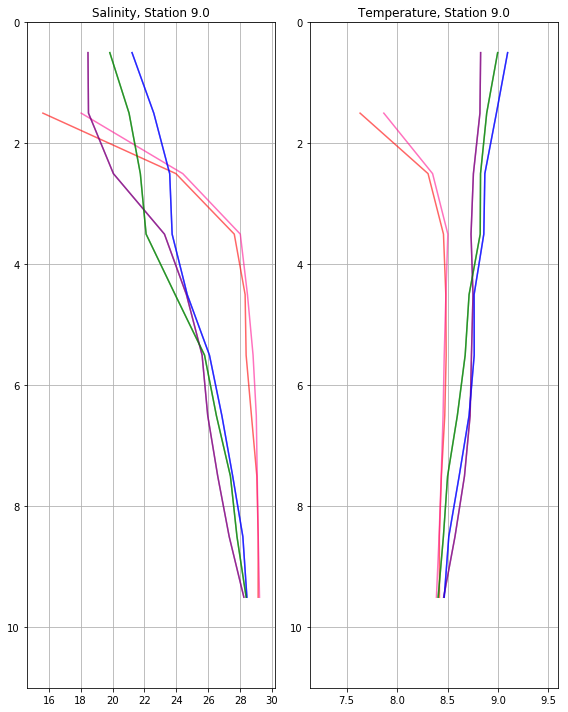

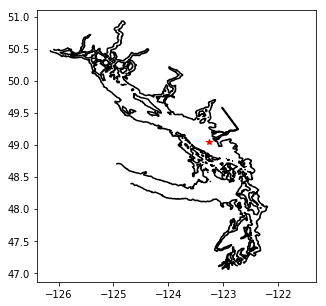

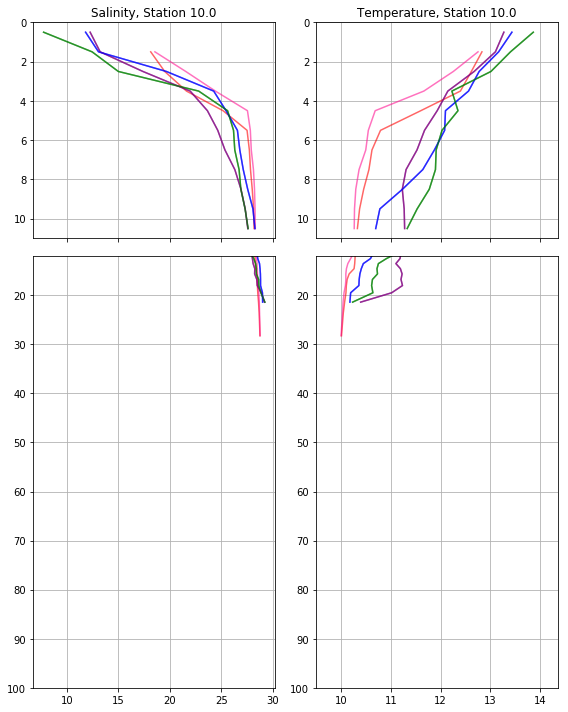

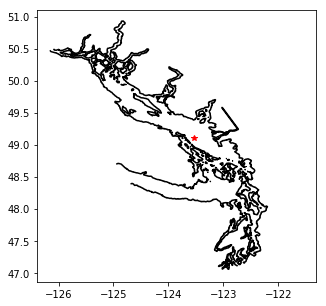

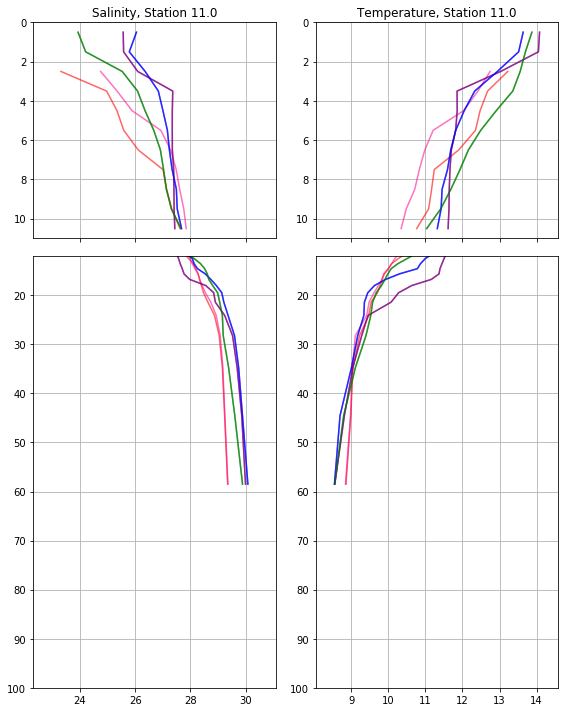

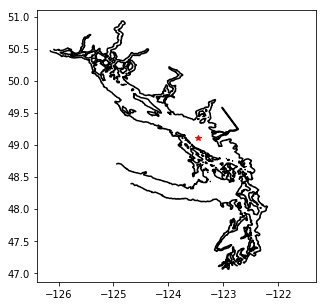

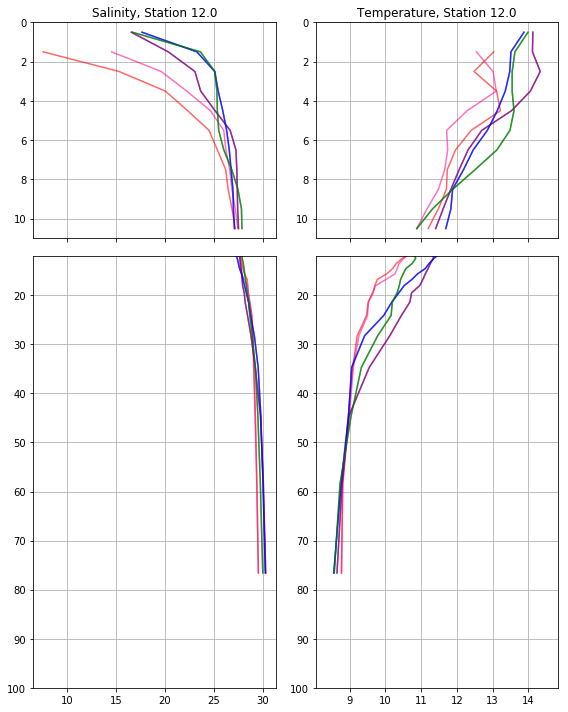

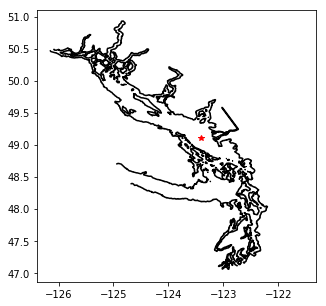

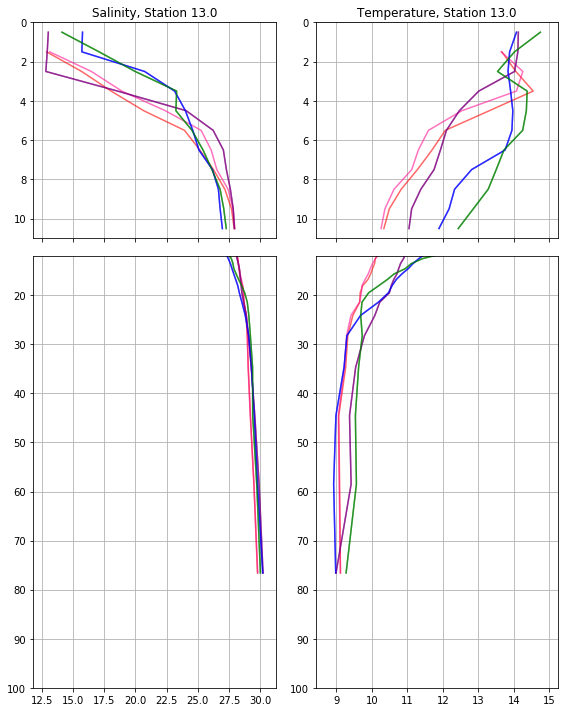

In [187]:
for n in range(8,13):
    where(stationdata.iloc[[n]]);
    compare_closest(stationdata.iloc[[n]], tmask);

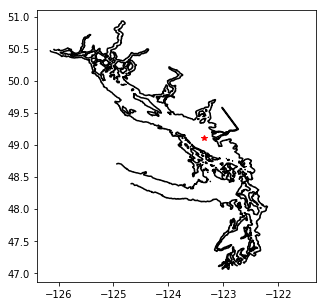

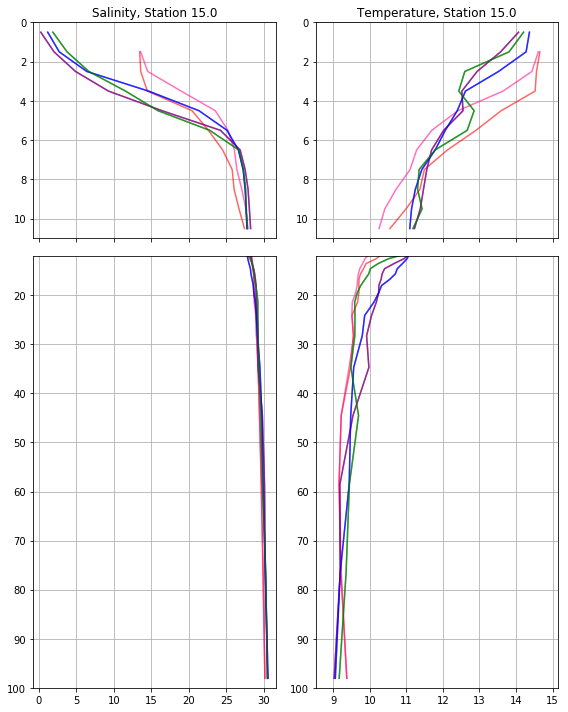

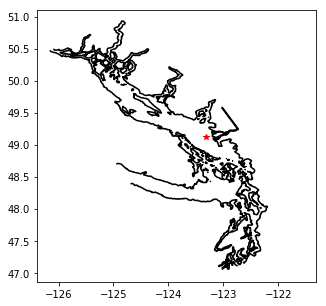

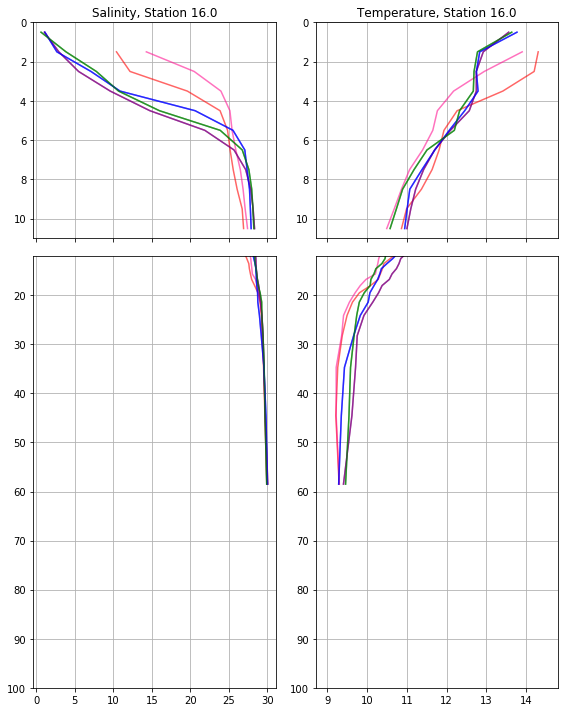

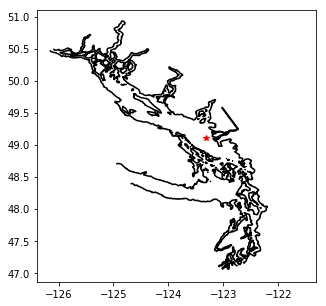

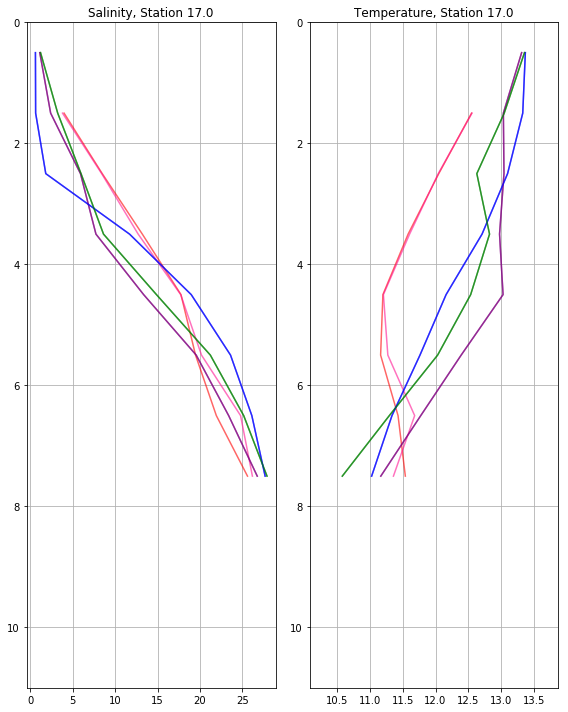

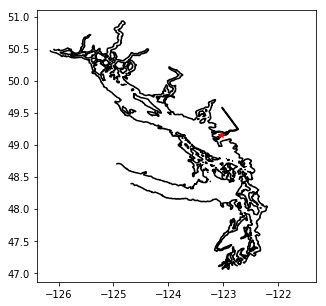

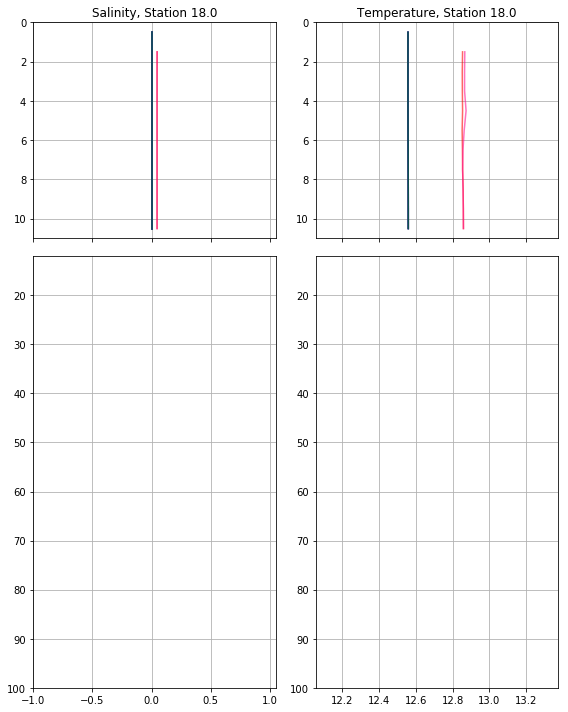

In [188]:
for n in range(15,19):
    where(stationdata.iloc[[n]]);
    compare_closest(stationdata.iloc[[n]], tmask);

In [170]:
obs_sal = np.array([])
model_base_sal = np.array([])
model_a_sal = np.array([])
model_b_sal = np.array([])
obs_temp = np.array([])
model_base_temp = np.array([])
model_a_temp = np.array([])
model_b_temp = np.array([])
for n in range(19):
    if (n != 14):
        if n != 13:
            print(n)
            station = stationdata.iloc[[n]]
            cast = casts[station['Station'].values[0]]
            Yind, Xind = geo_tools.find_closest_model_point(station['LonDecDeg'].values[0], 
                                                            station['LatDecDeg'].values[0],
                                                            X, Y, land_mask = bathy.mask)
            shape_depth = cast.uCast['depth_m'].values.shape[0]
            if mesh.variables['tmask'][0,0,Yind, Xind] == 1:
                if station['Date'].values == 20170410:
                    base=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthbase/testD/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
                    testa=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa/test44/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
                    testb=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsb/testd/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
                else: 
                    base=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthbase/testI/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
                    testa=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa/test99/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
                    testb=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsb/testi/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')

                deptht = base.variables['deptht'][:shape_depth]
                cast_sal_down = cast.dCast['gsw_srA0'].values
                cast_sal_up = cast.uCast['gsw_srA0'].values
                cast_temp_down = cast.dCast['gsw_ctA0'].values
                cast_temp_up = cast.uCast['gsw_ctA0'].values
                if int(stationdata.iloc[[2]]['Time_UTC_hhmmss'].values[0][3:5]) < 30:
                    delta = (30 + int(station['Time_UTC_hhmmss'].values[0][3:5])) / 60
                    before = int(station['Time_UTC_hhmmss'].values[0][:2]) - 1
                else:
                    delta = (int(station['Time_UTC_hhmmss'].values[0][3:5]) - 30) / 60
                    before = int(station['Time_UTC_hhmmss'].values[0][:2])
                pt_mask = tmask[0,:shape_depth,Yind,Xind]
                m_cast_sal_down = np.ma.masked_array(cast_sal_down, mask = 1-pt_mask)
                m_cast_sal_up = np.ma.masked_array(cast_sal_up, mask = 1-pt_mask)
                m_cast_temp_down = np.ma.masked_array(cast_temp_down, mask = 1-pt_mask)
                m_cast_temp_up = np.ma.masked_array(cast_sal_up, mask = 1-pt_mask)
                masked_depth = np.ma.masked_array(deptht, mask = 1-pt_mask)
                base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,Yind, Xind]
                                              + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,Yind, Xind],
                                              mask = 1-pt_mask)
                a_sal = np.ma.masked_array(delta*testa.variables['vosaline'][before,:shape_depth,Yind, Xind]
                                           +(1-delta)*testa.variables['vosaline'][before+1,:shape_depth,Yind,Xind], 
                                           mask = 1-pt_mask)
                b_sal = np.ma.masked_array(delta*testb.variables['vosaline'][before,:shape_depth,Yind, Xind]
                                           +(1-delta)*testb.variables['vosaline'][before+1,:shape_depth,Yind,Xind], 
                                           mask = 1-pt_mask)
                base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,Yind, Xind]
                                               +(1-delta)*base.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                               mask = 1-pt_mask)
                a_temp = np.ma.masked_array(delta*testa.variables['votemper'][before,:shape_depth,Yind, Xind]
                                            +(1-delta)*testa.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                            mask = 1-pt_mask)
                b_temp = np.ma.masked_array(delta*testb.variables['votemper'][before,:shape_depth,Yind, Xind]
                                            +(1-delta)*testb.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                            mask = 1-pt_mask)
                m_cast_temp_up2 = np.ma.masked_invalid(m_cast_temp_up)
                m_cast_temp_down2 = np.ma.masked_invalid(m_cast_temp_down)
                m_cast_sal_up2 = np.ma.masked_invalid(m_cast_sal_up)
                m_cast_sal_down2 = np.ma.masked_invalid(m_cast_sal_down)
                obs_sal = np.append(obs_sal, np.append(m_cast_sal_up2, m_cast_sal_down2))
                model_base_sal = np.append(model_base_sal, np.append(base_sal, base_sal))
                model_a_sal = np.append(model_a_sal, np.append(a_sal, a_sal))
                model_b_sal = np.append(model_b_sal, np.append(b_sal, b_sal))
                obs_temp = np.append(obs_temp, np.append(m_cast_temp_up2, m_cast_temp_down2))
                model_base_temp = np.append(model_base_temp, np.append(base_temp, base_temp))
                model_a_temp = np.append(model_a_temp, np.append(a_temp, a_temp))
                model_b_temp = np.append(model_b_temp, np.append(b_temp, b_temp))

0
1
2
3
4
5
6
7
8
9
10
11
12
15
16
17
18


In [171]:
station = stationdata.iloc[[13]]
cast = casts[station['Station'].values[0]]
Yind, Xind = geo_tools.find_closest_model_point(station['LonDecDeg'].values[0], 
                                                station['LatDecDeg'].values[0],
                                                X, Y, land_mask = bathy.mask)
shape_depth = cast.dCast['depth_m'].values.shape[0]
if mesh.variables['tmask'][0,0,Yind, Xind] == 1:
    if station['Date'].values == 20170410:
        base=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthbase/testD/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
        testa=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa/test44/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
        testb=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsb/testd/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
    else: 
        base=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthbase/testI/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
        testa=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa/test99/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
        testb=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsb/testi/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')

    deptht = base.variables['deptht'][:shape_depth]
    cast_sal_down = cast.dCast['gsw_srA0'].values
    cast_temp_down = cast.dCast['gsw_ctA0'].values
    if int(stationdata.iloc[[2]]['Time_UTC_hhmmss'].values[0][3:5]) < 30:
        delta = (30 + int(station['Time_UTC_hhmmss'].values[0][3:5])) / 60
        before = int(station['Time_UTC_hhmmss'].values[0][:2]) - 1
    else:
        delta = (int(station['Time_UTC_hhmmss'].values[0][3:5]) - 30) / 60
        before = int(station['Time_UTC_hhmmss'].values[0][:2])
    pt_mask = tmask[0,:shape_depth,Yind,Xind]
    m_cast_sal_down = np.ma.masked_array(cast_sal_down, mask = 1-pt_mask)
    m_cast_temp_down = np.ma.masked_array(cast_temp_down, mask = 1-pt_mask)
    masked_depth = np.ma.masked_array(deptht, mask = 1-pt_mask)
    base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,Yind, Xind]
                                  + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,Yind, Xind],
                                  mask = 1-pt_mask)
    a_sal = np.ma.masked_array(delta*testa.variables['vosaline'][before,:shape_depth,Yind, Xind]
                               +(1-delta)*testa.variables['vosaline'][before+1,:shape_depth,Yind,Xind], 
                               mask = 1-pt_mask)
    b_sal = np.ma.masked_array(delta*testb.variables['vosaline'][before,:shape_depth,Yind, Xind]
                               +(1-delta)*testb.variables['vosaline'][before+1,:shape_depth,Yind,Xind], 
                               mask = 1-pt_mask)
    base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,Yind, Xind]
                                   +(1-delta)*base.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                   mask = 1-pt_mask)
    a_temp = np.ma.masked_array(delta*testa.variables['votemper'][before,:shape_depth,Yind, Xind]
                                +(1-delta)*testa.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                mask = 1-pt_mask)
    b_temp = np.ma.masked_array(delta*testb.variables['votemper'][before,:shape_depth,Yind, Xind]
                                +(1-delta)*testb.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                mask = 1-pt_mask)

obs_sal = np.append(obs_sal,  m_cast_sal_down)
model_base_sal = np.append(model_base_sal, base_sal)
model_a_sal = np.append(model_a_sal, a_sal)
model_b_sal = np.append(model_b_sal,  b_sal)
obs_temp = np.append(obs_temp, m_cast_temp_down)
model_base_temp = np.append(model_base_temp, base_temp)
model_a_temp = np.append(model_a_temp,  a_temp)
model_b_temp = np.append(model_b_temp,  b_temp)

station = stationdata.iloc[[14]]
cast = casts[station['Station'].values[0]]
Yind, Xind = geo_tools.find_closest_model_point(station['LonDecDeg'].values[0], 
                                                station['LatDecDeg'].values[0],
                                                X, Y, land_mask = bathy.mask)
shape_depth = cast.uCast['depth_m'].values.shape[0]
if mesh.variables['tmask'][0,0,Yind, Xind] == 1:
    
    base=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthbase/testI/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
    testa=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa/test99/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
    testb=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsb/testi/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')

    deptht = base.variables['deptht'][:shape_depth]
    cast_sal_down = cast.uCast['gsw_srA0'].values
    cast_temp_down = cast.uCast['gsw_ctA0'].values
    if int(stationdata.iloc[[2]]['Time_UTC_hhmmss'].values[0][3:5]) < 30:
        delta = (30 + int(station['Time_UTC_hhmmss'].values[0][3:5])) / 60
        before = int(station['Time_UTC_hhmmss'].values[0][:2]) - 1
    else:
        delta = (int(station['Time_UTC_hhmmss'].values[0][3:5]) - 30) / 60
        before = int(station['Time_UTC_hhmmss'].values[0][:2])
    pt_mask = tmask[0,:shape_depth,Yind,Xind]
    m_cast_sal_down = np.ma.masked_array(cast_sal_down, mask = 1-pt_mask)
    m_cast_temp_down = np.ma.masked_array(cast_temp_down, mask = 1-pt_mask)
    masked_depth = np.ma.masked_array(deptht, mask = 1-pt_mask)
    base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,Yind, Xind]
                                  + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,Yind, Xind],
                                  mask = 1-pt_mask)
    a_sal = np.ma.masked_array(delta*testa.variables['vosaline'][before,:shape_depth,Yind, Xind]
                               +(1-delta)*testa.variables['vosaline'][before+1,:shape_depth,Yind,Xind], 
                               mask = 1-pt_mask)
    b_sal = np.ma.masked_array(delta*testb.variables['vosaline'][before,:shape_depth,Yind, Xind]
                               +(1-delta)*testb.variables['vosaline'][before+1,:shape_depth,Yind,Xind], 
                               mask = 1-pt_mask)
    base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,Yind, Xind]
                                   +(1-delta)*base.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                   mask = 1-pt_mask)
    a_temp = np.ma.masked_array(delta*testa.variables['votemper'][before,:shape_depth,Yind, Xind]
                                +(1-delta)*testa.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                mask = 1-pt_mask)
    b_temp = np.ma.masked_array(delta*testb.variables['votemper'][before,:shape_depth,Yind, Xind]
                                +(1-delta)*testb.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                mask = 1-pt_mask)

obs_sal = np.append(obs_sal,  m_cast_sal_down)
model_base_sal = np.append(model_base_sal, base_sal)
model_a_sal = np.append(model_a_sal, a_sal)
model_b_sal = np.append(model_b_sal,  b_sal)
obs_temp = np.append(obs_temp, m_cast_temp_down)
model_base_temp = np.append(model_base_temp, base_temp)
model_a_temp = np.append(model_a_temp,  a_temp)
model_b_temp = np.append(model_b_temp,  b_temp)

In [172]:
m_obs_sal = np.ma.masked_invalid(obs_sal)
m_obs_temp = np.ma.masked_invalid(obs_temp)

In [173]:
m_model_base_sal = np.ma.masked_array(model_base_sal, mask = m_obs_sal.mask)
m_model_a_sal = np.ma.masked_array(model_a_sal, mask = m_obs_sal.mask)
m_model_b_sal = np.ma.masked_array(model_b_sal, mask = m_obs_sal.mask)
m_model_base_temp = np.ma.masked_array(model_base_temp, mask = m_obs_temp.mask)
m_model_a_temp = np.ma.masked_array(model_a_temp, mask = m_obs_temp.mask)
m_model_b_temp = np.ma.masked_array(model_b_temp, mask = m_obs_temp.mask)

# Sallinity, base case

In [174]:
print('bias =  ' + str(-np.mean(m_obs_sal) + np.mean(m_model_base_sal)))
print('RMSE = ' + str(np.sqrt(np.sum((m_model_base_sal - m_obs_sal)**2) / len(m_model_base_sal))))
xbar = np.mean(m_obs_sal)
print('Willmott = ' + str(1-(np.sum((m_model_base_sal - m_obs_sal)**2)  / 
                             np.sum((np.abs(m_model_base_sal - xbar) + np.abs(m_obs_sal - xbar))**2))))

bias =  -0.234411013248
RMSE = 2.85520496008
Willmott = 0.964529242724


# Salinity, test a

In [175]:
print('bias =  ' + str(-np.mean(m_obs_sal) + np.mean(m_model_a_sal)))
print('RMSE = ' + str(np.sqrt(np.sum((m_model_a_sal - m_obs_sal)**2) / len(m_model_a_sal))))
xbar = np.mean(m_obs_sal)
print('Willmott = ' + str(1-(np.sum((m_model_a_sal - m_obs_sal)**2)  / 
                             np.sum((np.abs(m_model_a_sal - xbar) + np.abs(m_obs_sal - xbar))**2))))

bias =  0.00330828045634
RMSE = 2.87558260859
Willmott = 0.963325531401


# Salinity, test b

In [176]:
print('bias =  ' + str(-np.mean(m_obs_sal) + np.mean(m_model_b_sal)))
print('RMSE = ' + str(np.sqrt(np.sum((m_model_b_sal - m_obs_sal)**2) / len(m_model_b_sal))))
xbar = np.mean(m_obs_sal)
print('Willmott = ' + str(1-(np.sum((m_model_b_sal - m_obs_sal)**2)  / 
                             np.sum((np.abs(m_model_b_sal - xbar) + np.abs(m_obs_sal - xbar))**2))))

bias =  -0.14883724369
RMSE = 2.82911611377
Willmott = 0.964769556888


# Temperature, base case

In [177]:
print('bias =  ' + str(-np.mean(m_obs_temp) + np.mean(m_model_base_temp)))
print('RMSE = ' + str(np.sqrt(np.sum((m_model_base_temp - m_obs_temp)**2) / len(m_model_base_temp))))
xbar = np.mean(m_obs_temp)
print('Willmott = ' + str(1-(np.sum((m_model_base_temp - m_obs_temp)**2)  / 
                             np.sum((np.abs(m_model_base_temp - xbar) + np.abs(m_obs_temp - xbar))**2))))

bias =  -7.35377889424
RMSE = 11.9483065394
Willmott = 0.47730776999


# Temperature, test a

In [178]:
print('bias =  ' + str(-np.mean(m_obs_temp) + np.mean(m_model_a_temp)))
print('RMSE = ' + str(np.sqrt(np.sum((m_model_a_temp - m_obs_temp)**2) / len(m_model_a_temp))))
xbar = np.mean(m_obs_temp)
print('Willmott = ' + str(1-(np.sum((m_model_a_temp - m_obs_temp)**2)  / 
                             np.sum((np.abs(m_model_a_temp - xbar) + np.abs(m_obs_temp - xbar))**2))))

bias =  -7.36673536399
RMSE = 11.9762575706
Willmott = 0.476318526091


# Temperature, test b

In [179]:
print('bias =  ' + str(-np.mean(m_obs_temp) + np.mean(m_model_b_temp)))
print('RMSE = ' + str(np.sqrt(np.sum((m_model_b_temp - m_obs_temp)**2) / len(m_model_b_temp))))
xbar = np.mean(m_obs_temp)
print('Willmott = ' + str(1-(np.sum((m_model_b_temp - m_obs_temp)**2)  / 
                             np.sum((np.abs(m_model_b_temp - xbar) + np.abs(m_obs_temp - xbar))**2))))

bias =  -7.35785274173
RMSE = 11.9654918273
Willmott = 0.477003600421


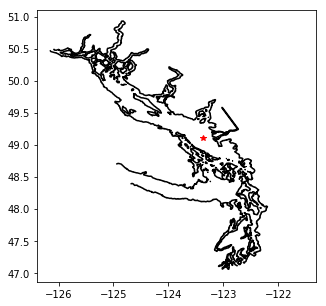

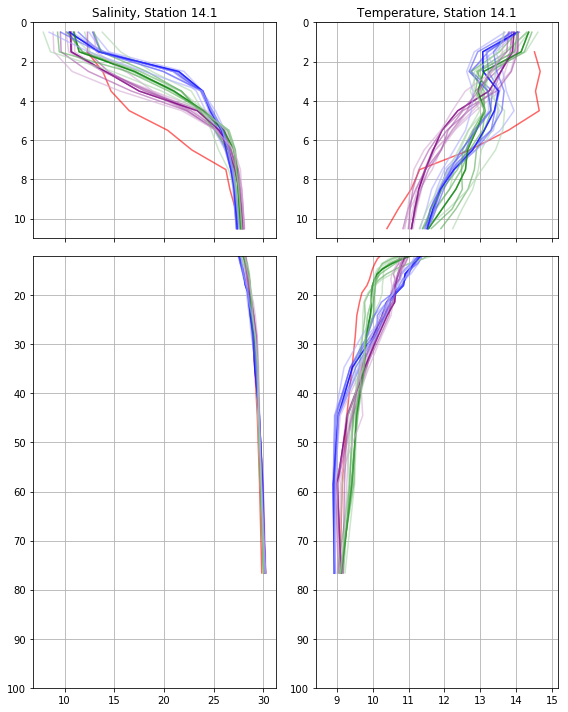

In [189]:
where(stationdata.iloc[[13]])
cast = casts[14.1]
Yind, Xind = geo_tools.find_closest_model_point(stationdata.iloc[[13]]['LonDecDeg'].values[0], 
                                                stationdata.iloc[[13]]['LatDecDeg'].values[0],
                                                X, Y, land_mask = bathy.mask)
base=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthbase/testI/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
testa=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa/test99/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
testb=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsb/testi/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
shape_depth = cast.dCast['depth_m'].values.shape[0]
fig, ax = plt.subplots(2,2,figsize = (8,10), gridspec_kw = {'height_ratios':[1, 2]} )
deptht = cast.dCast['depth_m'].values
cast_sal_down = cast.dCast['gsw_srA0'].values
cast_temp_down = cast.dCast['gsw_ctA0'].values
ax[0,0].plot(cast_sal_down[:11], deptht[:11], 'r-', alpha = 0.6)
ax[1,0].plot(cast_sal_down[11:], deptht[11:], 'r-', alpha = 0.6)
ax[0,1].plot(cast_temp_down[:11], deptht[:11], 'r-', alpha = 0.6)
ax[1,1].plot(cast_temp_down[11:], deptht[11:], 'r-', alpha = 0.6)
if int(stationdata.iloc[[2]]['Time_UTC_hhmmss'].values[0][3:5]) < 30:
    delta = (30 + int(stationdata.iloc[[13]]['Time_UTC_hhmmss'].values[0][3:5])) / 60
    before = int(stationdata.iloc[[13]]['Time_UTC_hhmmss'].values[0][:2]) - 1
else:
    delta = (int(stationdata.iloc[[13]]['Time_UTC_hhmmss'].values[0][3:5]) - 30) / 60
    before = int(stationdata.iloc[[13]]['Time_UTC_hhmmss'].values[0][:2])
n = 1
for j in range(Yind - 2, Yind + 3):
    pt_mask = tmask[0,:shape_depth,j,Xind]
    masked_depth = np.ma.masked_array(deptht, mask = 1-pt_mask)
    base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,j, Xind]
                                  + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,j, Xind],
                                  mask = 1-pt_mask)
    a_sal = np.ma.masked_array(delta*testa.variables['vosaline'][before,:shape_depth,j, Xind]
                               +(1-delta)*testa.variables['vosaline'][before+1,:shape_depth,j,Xind], 
                               mask = 1-pt_mask)
    b_sal = np.ma.masked_array(delta*testb.variables['vosaline'][before,:shape_depth,j, Xind]
                               +(1-delta)*testb.variables['vosaline'][before+1,:shape_depth,j,Xind], 
                               mask = 1-pt_mask)
    base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,j, Xind]
                                   +(1-delta)*base.variables['votemper'][before+1,:shape_depth,j,Xind], 
                                   mask = 1-pt_mask)
    a_temp = np.ma.masked_array(delta*testa.variables['votemper'][before,:shape_depth,j, Xind]
                                +(1-delta)*testa.variables['votemper'][before+1,:shape_depth,j,Xind], 
                                mask = 1-pt_mask)
    b_temp = np.ma.masked_array(delta*testb.variables['votemper'][before,:shape_depth,j, Xind]
                                +(1-delta)*testb.variables['votemper'][before+1,:shape_depth,j,Xind], 
                                mask = 1-pt_mask)
    ax[0,0].plot(base_sal[:11], deptht[:11], color = purples[n], alpha = 0.6)
    ax[0,0].plot(a_sal[:11], deptht[:11], color = blues[n], alpha = 0.6)
    ax[0,0].plot(b_sal[:11], deptht[:11], color= greens[n], alpha = 0.6)
    ax[1,0].plot(base_sal[11:], deptht[11:], color = purples[n], alpha = 0.6)
    ax[1,0].plot(a_sal[11:], deptht[11:], color = blues[n], alpha = 0.6)
    ax[1,0].plot(b_sal[11:], deptht[11:], color= greens[n], alpha = 0.6)
    ax[0,1].plot(base_temp[:11], deptht[:11], color = purples[n], alpha = 0.6)
    ax[0,1].plot(a_temp[:11], deptht[:11], color = blues[n], alpha = 0.6)
    ax[0,1].plot(b_temp[:11], deptht[:11], color = greens[n], alpha = 0.6)
    ax[1,1].plot(base_temp[11:], deptht[11:], color = purples[n], alpha = 0.6)
    ax[1,1].plot(a_temp[11:], deptht[11:], color = blues[n], alpha = 0.6)
    ax[1,1].plot(b_temp[11:], deptht[11:], color = greens[n], alpha = 0.6)
    n = n + 1
m = 1
for i in range(Xind - 2, Xind + 3):
    pt_mask = tmask[0,:shape_depth,Yind,i]
    masked_depth = np.ma.masked_array(deptht, mask = 1-pt_mask)
    base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,Yind, i]
                                  + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,Yind, i],
                                  mask = 1-pt_mask)
    a_sal = np.ma.masked_array(delta*testa.variables['vosaline'][before,:shape_depth,Yind, i]
                               +(1-delta)*testa.variables['vosaline'][before+1,:shape_depth,Yind,i], 
                               mask = 1-pt_mask)
    b_sal = np.ma.masked_array(delta*testb.variables['vosaline'][before,:shape_depth,Yind, i]
                               +(1-delta)*testb.variables['vosaline'][before+1,:shape_depth,Yind,i], 
                               mask = 1-pt_mask)
    base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,Yind, i]
                                   +(1-delta)*base.variables['votemper'][before+1,:shape_depth,Yind,i], 
                                   mask = 1-pt_mask)
    a_temp = np.ma.masked_array(delta*testa.variables['votemper'][before,:shape_depth,Yind, i]
                                +(1-delta)*testa.variables['votemper'][before+1,:shape_depth,Yind,i], 
                                mask = 1-pt_mask)
    b_temp = np.ma.masked_array(delta*testb.variables['votemper'][before,:shape_depth,Yind, i]
                                +(1-delta)*testb.variables['votemper'][before+1,:shape_depth,Yind,i], 
                                mask = 1-pt_mask)
    ax[0,0].plot(base_sal[:11], deptht[:11], color = purples[m], alpha = 0.6)
    ax[0,0].plot(a_sal[:11], deptht[:11], color = blues[m], alpha = 0.6)
    ax[0,0].plot(b_sal[:11], deptht[:11], color= greens[m], alpha = 0.6)
    ax[1,0].plot(base_sal[11:], deptht[11:], color = purples[m], alpha = 0.6)
    ax[1,0].plot(a_sal[11:], deptht[11:], color = blues[m], alpha = 0.6)
    ax[1,0].plot(b_sal[11:], deptht[11:], color= greens[m], alpha = 0.6)
    ax[0,1].plot(base_temp[:11], deptht[:11], color = purples[m], alpha = 0.6)
    ax[0,1].plot(a_temp[:11], deptht[:11], color = blues[m], alpha = 0.6)
    ax[0,1].plot(b_temp[:11], deptht[:11], color = greens[m], alpha = 0.6)
    ax[1,1].plot(base_temp[11:], deptht[11:], color = purples[m], alpha = 0.6)
    ax[1,1].plot(a_temp[11:], deptht[11:], color = blues[m], alpha = 0.6)
    ax[1,1].plot(b_temp[11:], deptht[11:], color = greens[m], alpha = 0.6)
    m = m + 1
min_sal = np.nanmin(np.array([ np.nanmin(cast_sal_down), 
                              np.nanmin(base_sal), np.nanmin(a_sal), np.nanmin(b_sal)]))
max_sal = np.nanmax(np.array([ np.nanmax(cast_sal_down), 
                              np.nanmax(base_sal), np.nanmax(a_sal), np.nanmax(b_sal)]))
min_temp = np.nanmin(np.array([np.nanmin(cast_temp_down), 
                             np.nanmin(base_temp),np.nanmin(a_temp), np.nanmin(b_temp)]))
max_temp = np.nanmax(np.array([ np.nanmax(cast_temp_down), 
                             np.nanmax(base_temp),np.nanmax(a_temp), np.nanmax(b_temp)]))
ax[0,0].set_ylim(11,0)
ax[0,1].set_ylim(11,0)
ax[1,0].set_ylim(100,12)
ax[1,1].set_ylim(100,12)
ax[0,0].set_xlim(min_sal-1,max_sal+1)
ax[0,1].set_xlim(min_temp-0.5,max_temp+0.5)
ax[1,0].set_xlim(min_sal-1,max_sal+1)
ax[1,1].set_xlim(min_temp-0.5,max_temp+0.5)
ax[0,0].set_title('Salinity, Station 14.1')
ax[0,1].set_title('Temperature, Station 14.1')
ax[0,0].tick_params(labelbottom='off')
ax[0,1].tick_params(labelbottom='off')
ax[0,0].grid('on')
ax[0,1].grid('on')
ax[1,0].grid('on')
ax[1,1].grid('on')
fig.tight_layout()

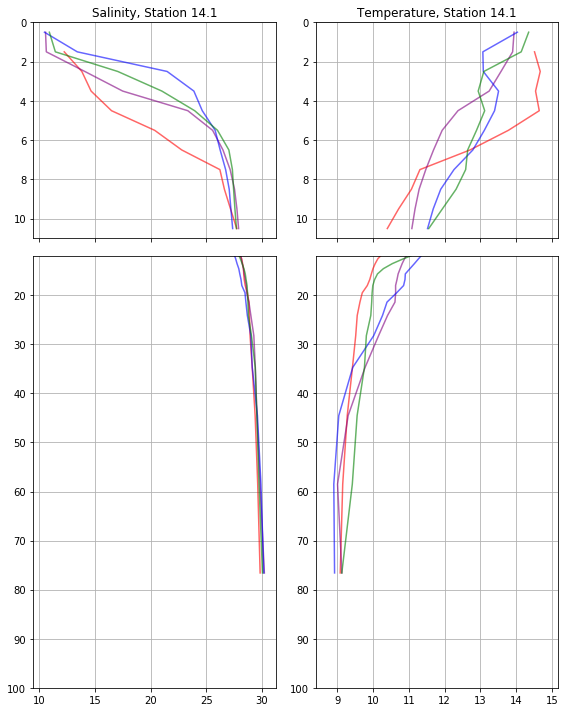

In [192]:
cast = casts[14.1]
Yind, Xind = geo_tools.find_closest_model_point(stationdata.iloc[[13]]['LonDecDeg'].values[0], 
                                                stationdata.iloc[[13]]['LatDecDeg'].values[0],
                                                X, Y, land_mask = bathy.mask)
base=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthbase/testI/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
testa=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa/test99/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
testb=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsb/testi/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
shape_depth = cast.dCast['depth_m'].values.shape[0]
fig, ax = plt.subplots(2,2,figsize = (8,10), gridspec_kw = {'height_ratios':[1, 2]} )
deptht = cast.dCast['depth_m'].values
cast_sal_down = cast.dCast['gsw_srA0'].values
cast_temp_down = cast.dCast['gsw_ctA0'].values
ax[0,0].plot(cast_sal_down[:11], deptht[:11], 'r-', alpha = 0.6)
ax[1,0].plot(cast_sal_down[11:], deptht[11:], 'r-', alpha = 0.6)
ax[0,1].plot(cast_temp_down[:11], deptht[:11], 'r-', alpha = 0.6)
ax[1,1].plot(cast_temp_down[11:], deptht[11:], 'r-', alpha = 0.6)
if int(stationdata.iloc[[2]]['Time_UTC_hhmmss'].values[0][3:5]) < 30:
    delta = (30 + int(stationdata.iloc[[13]]['Time_UTC_hhmmss'].values[0][3:5])) / 60
    before = int(stationdata.iloc[[13]]['Time_UTC_hhmmss'].values[0][:2]) - 1
else:
    delta = (int(stationdata.iloc[[13]]['Time_UTC_hhmmss'].values[0][3:5]) - 30) / 60
    before = int(stationdata.iloc[[13]]['Time_UTC_hhmmss'].values[0][:2])

pt_mask = tmask[0,:shape_depth,Yind,Xind]
masked_depth = np.ma.masked_array(deptht, mask = 1-pt_mask)
base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,Yind, Xind]
                              + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,Yind, Xind],
                              mask = 1-pt_mask)
a_sal = np.ma.masked_array(delta*testa.variables['vosaline'][before,:shape_depth,Yind, Xind]
                           +(1-delta)*testa.variables['vosaline'][before+1,:shape_depth,Yind,Xind], 
                           mask = 1-pt_mask)
b_sal = np.ma.masked_array(delta*testb.variables['vosaline'][before,:shape_depth,Yind, Xind]
                           +(1-delta)*testb.variables['vosaline'][before+1,:shape_depth,Yind,Xind], 
                           mask = 1-pt_mask)
base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,Yind, Xind]
                               +(1-delta)*base.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                               mask = 1-pt_mask)
a_temp = np.ma.masked_array(delta*testa.variables['votemper'][before,:shape_depth,Yind, Xind]
                            +(1-delta)*testa.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                            mask = 1-pt_mask)
b_temp = np.ma.masked_array(delta*testb.variables['votemper'][before,:shape_depth,Yind, Xind]
                            +(1-delta)*testb.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                            mask = 1-pt_mask)
ax[0,0].plot(base_sal[:11], deptht[:11], color = 'purple', alpha = 0.6)
ax[0,0].plot(a_sal[:11], deptht[:11], color = 'blue', alpha = 0.6)
ax[0,0].plot(b_sal[:11], deptht[:11], color= 'green', alpha = 0.6)
ax[1,0].plot(base_sal[11:], deptht[11:], color = 'purple', alpha = 0.6)
ax[1,0].plot(a_sal[11:], deptht[11:], color = 'blue', alpha = 0.6)
ax[1,0].plot(b_sal[11:], deptht[11:], color= 'green', alpha = 0.6)
ax[0,1].plot(base_temp[:11], deptht[:11], color = 'purple', alpha = 0.6)
ax[0,1].plot(a_temp[:11], deptht[:11], color = 'blue', alpha = 0.6)
ax[0,1].plot(b_temp[:11], deptht[:11], color = 'green', alpha = 0.6)
ax[1,1].plot(base_temp[11:], deptht[11:], color = 'purple', alpha = 0.6)
ax[1,1].plot(a_temp[11:], deptht[11:], color = 'blue', alpha = 0.6)
ax[1,1].plot(b_temp[11:], deptht[11:], color = 'green', alpha = 0.6)
min_sal = np.nanmin(np.array([ np.nanmin(cast_sal_down), 
                              np.nanmin(base_sal), np.nanmin(a_sal), np.nanmin(b_sal)]))
max_sal = np.nanmax(np.array([ np.nanmax(cast_sal_down), 
                              np.nanmax(base_sal), np.nanmax(a_sal), np.nanmax(b_sal)]))
min_temp = np.nanmin(np.array([np.nanmin(cast_temp_down), 
                             np.nanmin(base_temp),np.nanmin(a_temp), np.nanmin(b_temp)]))
max_temp = np.nanmax(np.array([ np.nanmax(cast_temp_down), 
                             np.nanmax(base_temp),np.nanmax(a_temp), np.nanmax(b_temp)]))
ax[0,0].set_ylim(11,0)
ax[0,1].set_ylim(11,0)
ax[1,0].set_ylim(100,12)
ax[1,1].set_ylim(100,12)
ax[0,0].set_xlim(min_sal-1,max_sal+1)
ax[0,1].set_xlim(min_temp-0.5,max_temp+0.5)
ax[1,0].set_xlim(min_sal-1,max_sal+1)
ax[1,1].set_xlim(min_temp-0.5,max_temp+0.5)
ax[0,0].set_title('Salinity, Station 14.1')
ax[0,1].set_title('Temperature, Station 14.1')
ax[0,0].tick_params(labelbottom='off')
ax[0,1].tick_params(labelbottom='off')
ax[0,0].grid('on')
ax[0,1].grid('on')
ax[1,0].grid('on')
ax[1,1].grid('on')
fig.tight_layout()

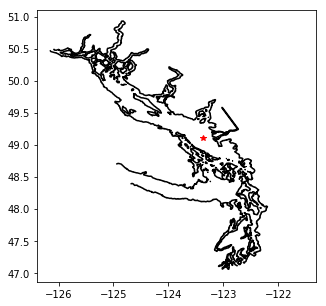

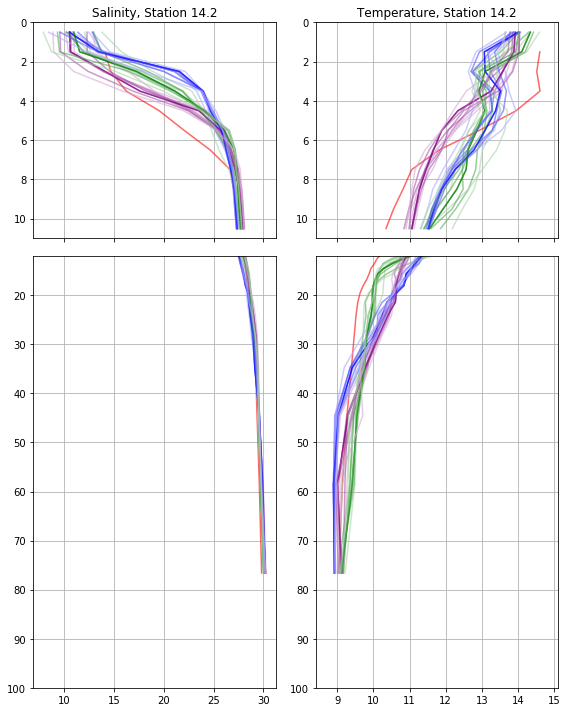

In [190]:
where(stationdata.iloc[[14]])
cast = casts[14.2]
Yind, Xind = geo_tools.find_closest_model_point(stationdata.iloc[[14]]['LonDecDeg'].values[0], 
                                                stationdata.iloc[[14]]['LatDecDeg'].values[0],
                                                X, Y, land_mask = bathy.mask)
base=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthbase/testI/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
testa=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa/test99/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
testb=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsb/testi/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
shape_depth = cast.uCast['depth_m'].values.shape[0]
fig, ax = plt.subplots(2,2,figsize = (8,10), gridspec_kw = {'height_ratios':[1, 2]} )
deptht = cast.uCast['depth_m'].values
cast_sal_down = cast.uCast['gsw_srA0'].values
cast_temp_down = cast.uCast['gsw_ctA0'].values
ax[0,0].plot(cast_sal_down[:11], deptht[:11], 'r-', alpha = 0.6)
ax[1,0].plot(cast_sal_down[11:], deptht[11:], 'r-', alpha = 0.6)
ax[0,1].plot(cast_temp_down[:11], deptht[:11], 'r-', alpha = 0.6)
ax[1,1].plot(cast_temp_down[11:], deptht[11:], 'r-', alpha = 0.6)
if int(stationdata.iloc[[2]]['Time_UTC_hhmmss'].values[0][3:5]) < 30:
    delta = (30 + int(stationdata.iloc[[14]]['Time_UTC_hhmmss'].values[0][3:5])) / 60
    before = int(stationdata.iloc[[14]]['Time_UTC_hhmmss'].values[0][:2]) - 1
else:
    delta = (int(stationdata.iloc[[14]]['Time_UTC_hhmmss'].values[0][3:5]) - 30) / 60
    before = int(stationdata.iloc[[14]]['Time_UTC_hhmmss'].values[0][:2])
n = 1
for j in range(Yind - 2, Yind + 3):
    pt_mask = tmask[0,:shape_depth,j,Xind]
    masked_depth = np.ma.masked_array(deptht, mask = 1-pt_mask)
    base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,j, Xind]
                                  + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,j, Xind],
                                  mask = 1-pt_mask)
    a_sal = np.ma.masked_array(delta*testa.variables['vosaline'][before,:shape_depth,j, Xind]
                               +(1-delta)*testa.variables['vosaline'][before+1,:shape_depth,j,Xind], 
                               mask = 1-pt_mask)
    b_sal = np.ma.masked_array(delta*testb.variables['vosaline'][before,:shape_depth,j, Xind]
                               +(1-delta)*testb.variables['vosaline'][before+1,:shape_depth,j,Xind], 
                               mask = 1-pt_mask)
    base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,j, Xind]
                                   +(1-delta)*base.variables['votemper'][before+1,:shape_depth,j,Xind], 
                                   mask = 1-pt_mask)
    a_temp = np.ma.masked_array(delta*testa.variables['votemper'][before,:shape_depth,j, Xind]
                                +(1-delta)*testa.variables['votemper'][before+1,:shape_depth,j,Xind], 
                                mask = 1-pt_mask)
    b_temp = np.ma.masked_array(delta*testb.variables['votemper'][before,:shape_depth,j, Xind]
                                +(1-delta)*testb.variables['votemper'][before+1,:shape_depth,j,Xind], 
                                mask = 1-pt_mask)
    ax[0,0].plot(base_sal[:11], deptht[:11], color = purples[n], alpha = 0.6)
    ax[0,0].plot(a_sal[:11], deptht[:11], color = blues[n], alpha = 0.6)
    ax[0,0].plot(b_sal[:11], deptht[:11], color= greens[n], alpha = 0.6)
    ax[1,0].plot(base_sal[11:], deptht[11:], color = purples[n], alpha = 0.6)
    ax[1,0].plot(a_sal[11:], deptht[11:], color = blues[n], alpha = 0.6)
    ax[1,0].plot(b_sal[11:], deptht[11:], color= greens[n], alpha = 0.6)
    ax[0,1].plot(base_temp[:11], deptht[:11], color = purples[n], alpha = 0.6)
    ax[0,1].plot(a_temp[:11], deptht[:11], color = blues[n], alpha = 0.6)
    ax[0,1].plot(b_temp[:11], deptht[:11], color = greens[n], alpha = 0.6)
    ax[1,1].plot(base_temp[11:], deptht[11:], color = purples[n], alpha = 0.6)
    ax[1,1].plot(a_temp[11:], deptht[11:], color = blues[n], alpha = 0.6)
    ax[1,1].plot(b_temp[11:], deptht[11:], color = greens[n], alpha = 0.6)
    n = n + 1
m = 1
for i in range(Xind - 2, Xind + 3):
    pt_mask = tmask[0,:shape_depth,Yind,i]
    masked_depth = np.ma.masked_array(deptht, mask = 1-pt_mask)
    base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,Yind, i]
                                  + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,Yind, i],
                                  mask = 1-pt_mask)
    a_sal = np.ma.masked_array(delta*testa.variables['vosaline'][before,:shape_depth,Yind, i]
                               +(1-delta)*testa.variables['vosaline'][before+1,:shape_depth,Yind,i], 
                               mask = 1-pt_mask)
    b_sal = np.ma.masked_array(delta*testb.variables['vosaline'][before,:shape_depth,Yind, i]
                               +(1-delta)*testb.variables['vosaline'][before+1,:shape_depth,Yind,i], 
                               mask = 1-pt_mask)
    base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,Yind, i]
                                   +(1-delta)*base.variables['votemper'][before+1,:shape_depth,Yind,i], 
                                   mask = 1-pt_mask)
    a_temp = np.ma.masked_array(delta*testa.variables['votemper'][before,:shape_depth,Yind, i]
                                +(1-delta)*testa.variables['votemper'][before+1,:shape_depth,Yind,i], 
                                mask = 1-pt_mask)
    b_temp = np.ma.masked_array(delta*testb.variables['votemper'][before,:shape_depth,Yind, i]
                                +(1-delta)*testb.variables['votemper'][before+1,:shape_depth,Yind,i], 
                                mask = 1-pt_mask)
    ax[0,0].plot(base_sal[:11], deptht[:11], color = purples[m], alpha = 0.6)
    ax[0,0].plot(a_sal[:11], deptht[:11], color = blues[m], alpha = 0.6)
    ax[0,0].plot(b_sal[:11], deptht[:11], color= greens[m], alpha = 0.6)
    ax[1,0].plot(base_sal[11:], deptht[11:], color = purples[m], alpha = 0.6)
    ax[1,0].plot(a_sal[11:], deptht[11:], color = blues[m], alpha = 0.6)
    ax[1,0].plot(b_sal[11:], deptht[11:], color= greens[m], alpha = 0.6)
    ax[0,1].plot(base_temp[:11], deptht[:11], color = purples[m], alpha = 0.6)
    ax[0,1].plot(a_temp[:11], deptht[:11], color = blues[m], alpha = 0.6)
    ax[0,1].plot(b_temp[:11], deptht[:11], color = greens[m], alpha = 0.6)
    ax[1,1].plot(base_temp[11:], deptht[11:], color = purples[m], alpha = 0.6)
    ax[1,1].plot(a_temp[11:], deptht[11:], color = blues[m], alpha = 0.6)
    ax[1,1].plot(b_temp[11:], deptht[11:], color = greens[m], alpha = 0.6)
    m = m + 1
min_sal = np.nanmin(np.array([ np.nanmin(cast_sal_down), 
                              np.nanmin(base_sal), np.nanmin(a_sal), np.nanmin(b_sal)]))
max_sal = np.nanmax(np.array([ np.nanmax(cast_sal_down), 
                              np.nanmax(base_sal), np.nanmax(a_sal), np.nanmax(b_sal)]))
min_temp = np.nanmin(np.array([np.nanmin(cast_temp_down), 
                             np.nanmin(base_temp),np.nanmin(a_temp), np.nanmin(b_temp)]))
max_temp = np.nanmax(np.array([ np.nanmax(cast_temp_down), 
                             np.nanmax(base_temp),np.nanmax(a_temp), np.nanmax(b_temp)]))
ax[0,0].set_ylim(11,0)
ax[0,1].set_ylim(11,0)
ax[1,0].set_ylim(100,12)
ax[1,1].set_ylim(100,12)
ax[0,0].set_xlim(min_sal-1,max_sal+1)
ax[0,1].set_xlim(min_temp-0.5,max_temp+0.5)
ax[1,0].set_xlim(min_sal-1,max_sal+1)
ax[1,1].set_xlim(min_temp-0.5,max_temp+0.5)
ax[0,0].set_title('Salinity, Station 14.2')
ax[0,1].set_title('Temperature, Station 14.2')
ax[0,0].tick_params(labelbottom='off')
ax[0,1].tick_params(labelbottom='off')
ax[0,0].grid('on')
ax[0,1].grid('on')
ax[1,0].grid('on')
ax[1,1].grid('on')
fig.tight_layout()

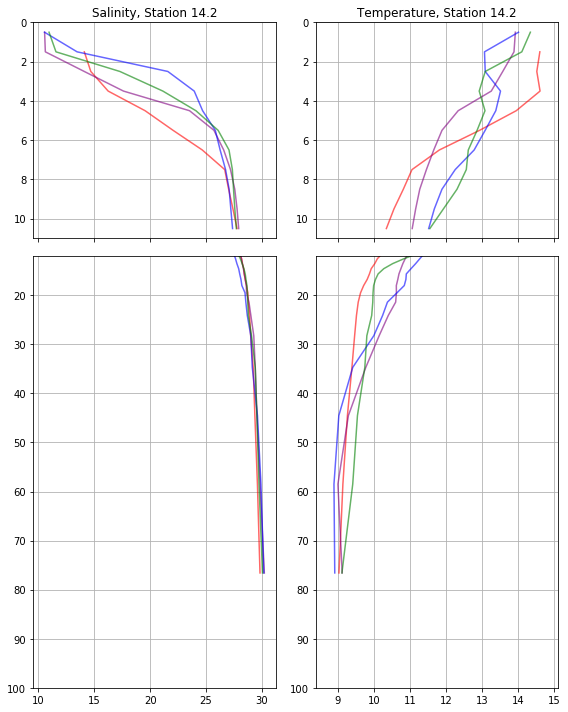

In [197]:
cast = casts[14.2]
Yind, Xind = geo_tools.find_closest_model_point(stationdata.iloc[[14]]['LonDecDeg'].values[0], 
                                                stationdata.iloc[[14]]['LatDecDeg'].values[0],
                                                X, Y, land_mask = bathy.mask)
base=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthbase/testI/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
testa=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa/test99/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
testb=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsb/testi/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
shape_depth = cast.uCast['depth_m'].values.shape[0]
fig, ax = plt.subplots(2,2,figsize = (8,10), gridspec_kw = {'height_ratios':[1, 2]} )
deptht = cast.uCast['depth_m'].values
cast_sal_down = cast.uCast['gsw_srA0'].values
cast_temp_down = cast.uCast['gsw_ctA0'].values
ax[0,0].plot(cast_sal_down[:11], deptht[:11], 'r-', alpha = 0.6)
ax[1,0].plot(cast_sal_down[11:], deptht[11:], 'r-', alpha = 0.6)
ax[0,1].plot(cast_temp_down[:11], deptht[:11], 'r-', alpha = 0.6)
ax[1,1].plot(cast_temp_down[11:], deptht[11:], 'r-', alpha = 0.6)
if int(stationdata.iloc[[14]]['Time_UTC_hhmmss'].values[0][3:5]) < 30:
    delta = (30 + int(stationdata.iloc[[14]]['Time_UTC_hhmmss'].values[0][3:5])) / 60
    before = int(stationdata.iloc[[14]]['Time_UTC_hhmmss'].values[0][:2]) - 1
else:
    delta = (int(stationdata.iloc[[14]]['Time_UTC_hhmmss'].values[0][3:5]) - 30) / 60
    before = int(stationdata.iloc[[14]]['Time_UTC_hhmmss'].values[0][:2])
pt_mask = tmask[0,:shape_depth,Yind,Xind]
masked_depth = np.ma.masked_array(deptht, mask = 1-pt_mask)
base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,Yind, Xind]
                              + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,Yind, Xind],
                              mask = 1-pt_mask)
a_sal = np.ma.masked_array(delta*testa.variables['vosaline'][before,:shape_depth,Yind, Xind]
                           +(1-delta)*testa.variables['vosaline'][before+1,:shape_depth,Yind,Xind], 
                           mask = 1-pt_mask)
b_sal = np.ma.masked_array(delta*testb.variables['vosaline'][before,:shape_depth,Yind, Xind]
                           +(1-delta)*testb.variables['vosaline'][before+1,:shape_depth,Yind,Xind], 
                           mask = 1-pt_mask)
base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,Yind, Xind]
                               +(1-delta)*base.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                               mask = 1-pt_mask)
a_temp = np.ma.masked_array(delta*testa.variables['votemper'][before,:shape_depth,Yind, Xind]
                            +(1-delta)*testa.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                            mask = 1-pt_mask)
b_temp = np.ma.masked_array(delta*testb.variables['votemper'][before,:shape_depth,Yind, Xind]
                            +(1-delta)*testb.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                            mask = 1-pt_mask)
ax[0,0].plot(base_sal[:11], deptht[:11], color = 'purple', alpha = 0.6)
ax[0,0].plot(a_sal[:11], deptht[:11], color = 'blue', alpha = 0.6)
ax[0,0].plot(b_sal[:11], deptht[:11], color= 'green', alpha = 0.6)
ax[1,0].plot(base_sal[11:], deptht[11:], color = 'purple', alpha = 0.6)
ax[1,0].plot(a_sal[11:], deptht[11:], color = 'blue', alpha = 0.6)
ax[1,0].plot(b_sal[11:], deptht[11:], color= 'green', alpha = 0.6)
ax[0,1].plot(base_temp[:11], deptht[:11], color = 'purple', alpha = 0.6)
ax[0,1].plot(a_temp[:11], deptht[:11], color = 'blue', alpha = 0.6)
ax[0,1].plot(b_temp[:11], deptht[:11], color = 'green', alpha = 0.6)
ax[1,1].plot(base_temp[11:], deptht[11:], color = 'purple', alpha = 0.6)
ax[1,1].plot(a_temp[11:], deptht[11:], color = 'blue', alpha = 0.6)
ax[1,1].plot(b_temp[11:], deptht[11:], color = 'green', alpha = 0.6)
min_sal = np.nanmin(np.array([ np.nanmin(cast_sal_down), 
                              np.nanmin(base_sal), np.nanmin(a_sal), np.nanmin(b_sal)]))
max_sal = np.nanmax(np.array([ np.nanmax(cast_sal_down), 
                              np.nanmax(base_sal), np.nanmax(a_sal), np.nanmax(b_sal)]))
min_temp = np.nanmin(np.array([np.nanmin(cast_temp_down), 
                             np.nanmin(base_temp),np.nanmin(a_temp), np.nanmin(b_temp)]))
max_temp = np.nanmax(np.array([ np.nanmax(cast_temp_down), 
                             np.nanmax(base_temp),np.nanmax(a_temp), np.nanmax(b_temp)]))
ax[0,0].set_ylim(11,0)
ax[0,1].set_ylim(11,0)
ax[1,0].set_ylim(100,12)
ax[1,1].set_ylim(100,12)
ax[0,0].set_xlim(min_sal-1,max_sal+1)
ax[0,1].set_xlim(min_temp-0.5,max_temp+0.5)
ax[1,0].set_xlim(min_sal-1,max_sal+1)
ax[1,1].set_xlim(min_temp-0.5,max_temp+0.5)
ax[0,0].set_title('Salinity, Station 14.2')
ax[0,1].set_title('Temperature, Station 14.2')
ax[0,0].tick_params(labelbottom='off')
ax[0,1].tick_params(labelbottom='off')
ax[0,0].grid('on')
ax[0,1].grid('on')
ax[1,0].grid('on')
ax[1,1].grid('on')
fig.tight_layout()